<a href="https://colab.research.google.com/github/KeertanPatro/EDA_Classification/blob/main/Cardiovascular_risk_prediction_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascualr risk prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

# data wrangling
import pandas as pd
import numpy as np

# data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# librariers for hypothesis tests

from scipy.stats import chi2_contingency

# libraries for data preprocessing and ML model implementation
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, roc_curve,classification_report

In [2]:
plt.style.use('ggplot')

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [4]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification_Capstone_project /data_cardiovascular_risk.csv')

### Dataset First View

In [6]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [7]:
# Dataset Last look
df.tail()

id  age  education sex is_smoking  cigsPerDay  BPMeds  \
3385  3385   60        1.0   F         NO         0.0     0.0   
3386  3386   46        1.0   F         NO         0.0     0.0   
3387  3387   44        3.0   M        YES         3.0     0.0   
3388  3388   60        1.0   M         NO         0.0     NaN   
3389  3389   54        3.0   F         NO         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
3385                0             0         0    261.0  123.5   79.0  29.28   
3386                0             0         0    199.0  102.0   56.0  21.96   
3387                0             1         0    352.0  164.0  119.0  28.92   
3388                0             1         0    191.0  167.0  105.0  23.01   
3389                0             0         0    288.0  124.0   77.0  29.88   

      heartRate  glucose  TenYearCHD  
3385       70.0    103.0           0  
3386       80.0     84.0           0  
3387       73.0     72.0           1  
3388       80.0     85.0           0  
3389       79.0     92.0           0

### Dataset Rows & Columns count

In [8]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df[df.duplicated()]

Empty DataFrame
Columns: [id, age, education, sex, is_smoking, cigsPerDay, BPMeds, prevalentStroke, prevalentHyp, diabetes, totChol, sysBP, diaBP, BMI, heartRate, glucose, TenYearCHD]
Index: []

There are no duplicate values found in this dataset.

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

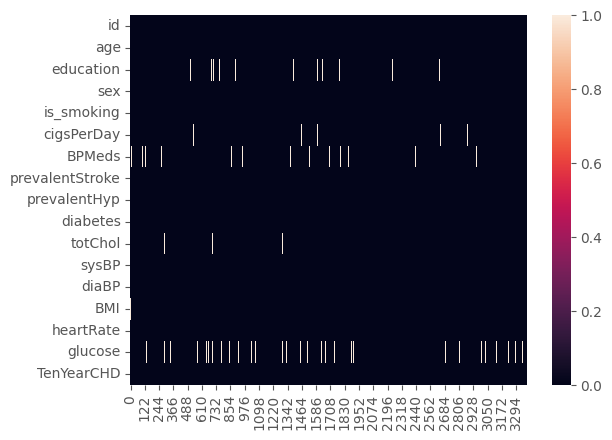

In [12]:
# Visualizing the missing values
sns.heatmap(df.isna().transpose())

### What did you know about your dataset?

* The Dataset has 3390 rowa and 17 columns.
* There are no duplicates in this dataset.
* There are null values in certain columns.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [14]:
# Dataset Describe

df.describe()

id          age    education   cigsPerDay       BPMeds  \
count  3390.000000  3390.000000  3303.000000  3368.000000  3346.000000   
mean   1694.500000    49.542183     1.970936     9.069477     0.029886   
std     978.753033     8.592878     1.019081    11.879078     0.170299   
min       0.000000    32.000000     1.000000     0.000000     0.000000   
25%     847.250000    42.000000     1.000000     0.000000     0.000000   
50%    1694.500000    49.000000     2.000000     0.000000     0.000000   
75%    2541.750000    56.000000     3.000000    20.000000     0.000000   
max    3389.000000    70.000000     4.000000    70.000000     1.000000   

       prevalentStroke  prevalentHyp     diabetes      totChol       sysBP  \
count      3390.000000   3390.000000  3390.000000  3352.000000  3390.00000   
mean          0.006490      0.315339     0.025664   237.074284   132.60118   
std           0.080309      0.464719     0.158153    45.247430    22.29203   
min           0.000000      0.000000     0.000000   107.000000    83.50000   
25%           0.000000      0.000000     0.000000   206.000000   117.00000   
50%           0.000000      0.000000     0.000000   234.000000   128.50000   
75%           0.000000      1.000000     0.000000   264.000000   144.00000   
max           1.000000      1.000000     1.000000   696.000000   295.00000   

             diaBP          BMI    heartRate      glucose   TenYearCHD  
count  3390.000000  3376.000000  3389.000000  3086.000000  3390.000000  
mean     82.883038    25.794964    75.977279    82.086520     0.150737  
std      12.023581     4.115449    11.971868    24.244753     0.357846  
min      48.000000    15.960000    45.000000    40.000000     0.000000  
25%      74.500000    23.020000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.040000    83.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [15]:
# categorical variables
df.describe(include=['object','category'])

sex is_smoking
count   3390       3390
unique     2          2
top        F         NO
freq    1923       1703

In [16]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Variables Description

There are 15 variables each of the variables is a potential risk factor in causing a coronary heart disease. These 15 variables can be categorised into 3 classification, they are Demographic, behavorial and medical.

**Demographic**
* Sex:  Sex of the person("M" or "F").
* Age: Age of the person(Continious)

**Behavorial**
* is_smoking: Is the person smoking or not ("YES" or "NO")
* Cigs_per_Day: How cigerattes does the person smoke per day.


**Medical**
* BP meds : whether or not the patient was on blood pressure medication (Nominal)
* Prevalent_stroke:  whether or not the patient had previously had a stroke (Nominal)
* Prevalent_hyp:  whether or not the patient was hypertensive (Nominal)
* Diabetes:
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous)
* Glucose: glucose level (Continuous)

**Target variable (desired target)**
* TenYearCHD: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
DV

### Check Unique Values for each variable.

In [17]:
# Check Unique Values for each variable.
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
df.drop('id',axis=1,inplace=True)

In [19]:
# distinguishing numerical and categorical variables

cat_variables=[i for i in df.columns if df[i].nunique()<=4]
print(cat_variables)
num_variables=[i for i in df.columns if df[i].nunique()>4]
print(num_variables)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


### What all manipulations have you done and insights you found?

1. I first dropped 'id' column from the dataset.
2. I distinguished numerical column and categorical column based on the fact that if number of unique values are less than 4 it is categorical if more than 4 it is numerical.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

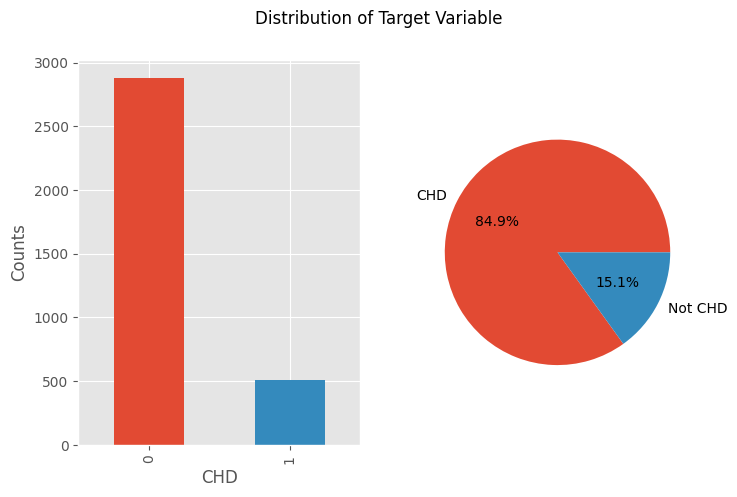

In [20]:
# Chart - 1 visualization code

# Distribution of Target variable
color=sns.color_palette()
fig=plt.figure(figsize=(8,5))
fig.suptitle("Distribution of Target Variable")
plt.subplot(1,2,1)
df['TenYearCHD'].value_counts().plot.bar(color=color)
plt.xlabel("CHD")
plt.ylabel("Counts")
plt.subplot(1,2,2)
plt.pie(df['TenYearCHD'].value_counts(),labels=['CHD','Not CHD'],autopct='%.1f%%',colors=color)

plt.show()

##### 1. Why did you pick the specific chart?

It is important to know how your target variables are distributed, based on that you can do certain transformation while fitting ML models.

##### 2. What is/are the insight(s) found from the chart?

We see that about 85 % of the people in this dataset don't have a risk of getting cornonary heart disease, while 15% have the risk of getting a cornonary heart disease, this makes the dataset imbalance.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The above insight will help us create appropriate ML models which will help us in better prediction

#### Chart - 2

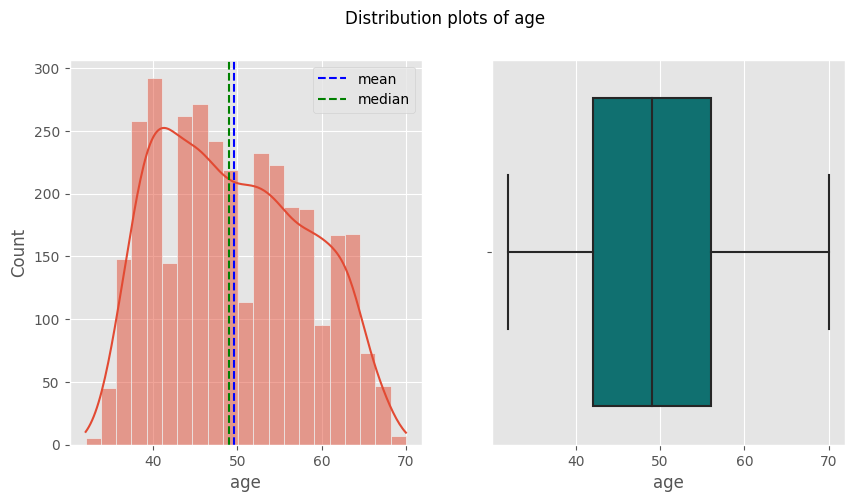

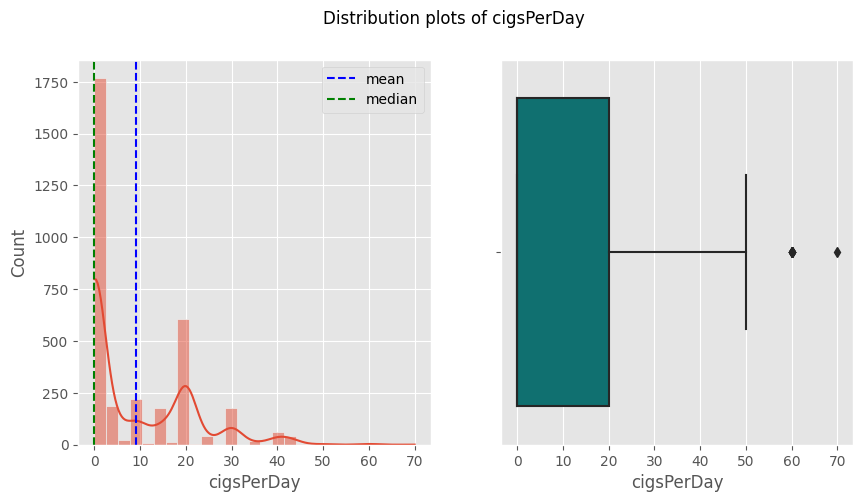

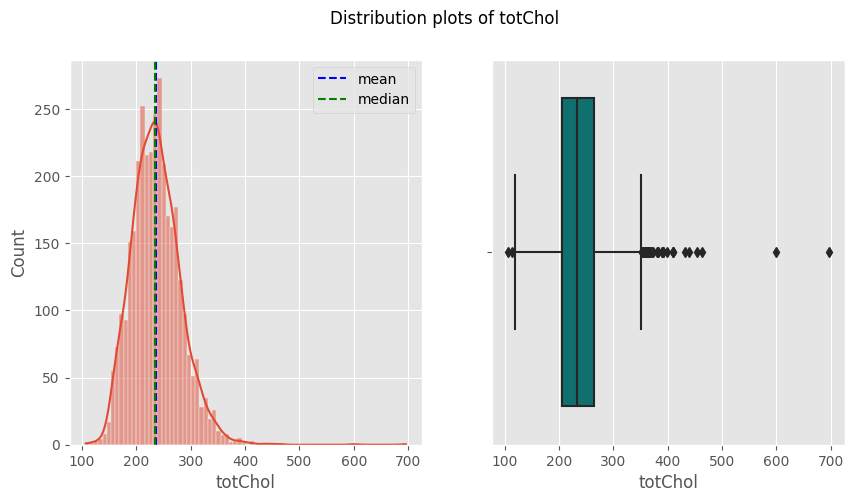

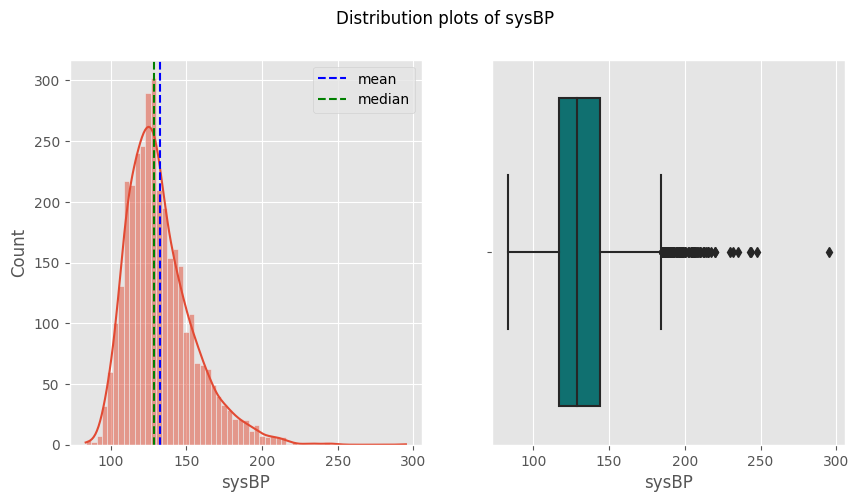

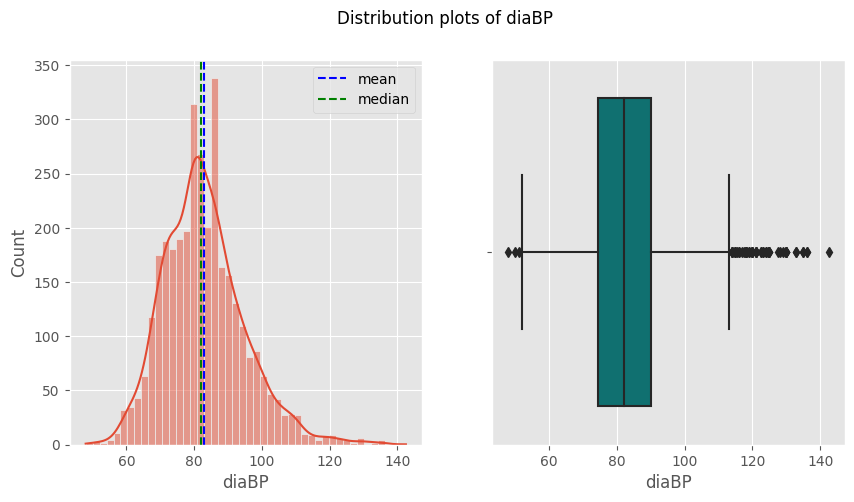

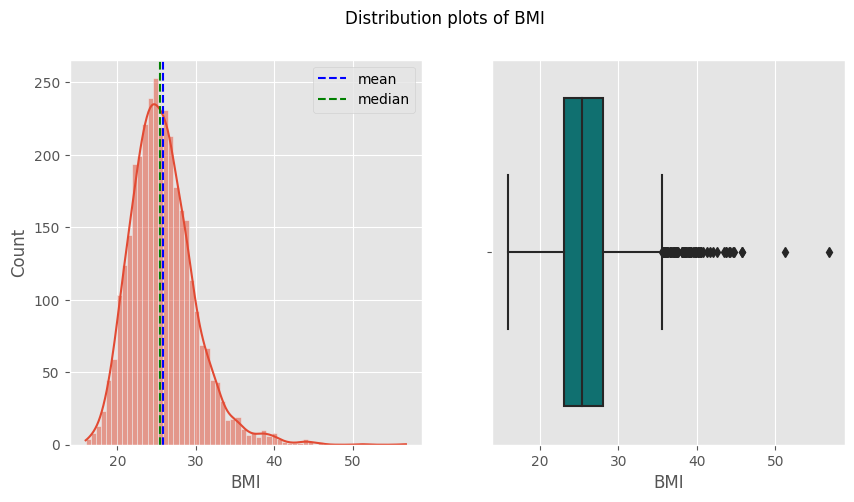

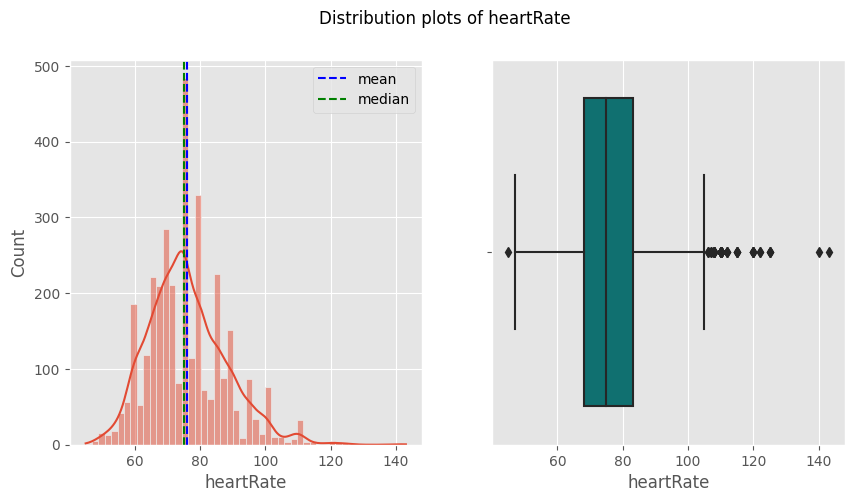

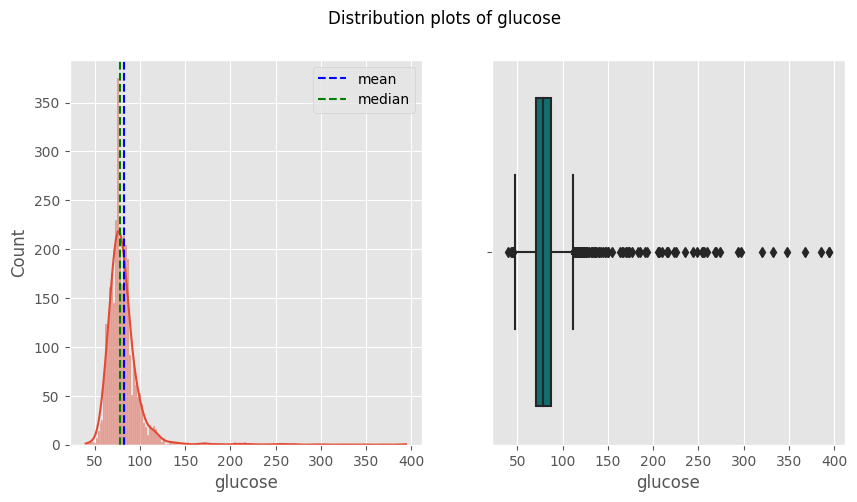

In [21]:
# Chart - 2 visualization code
# Distribution of numeric variables
for i in num_variables:
  fig,ax=plt.subplots(1,2,figsize=(10,5))
  sns.histplot(df[i],kde=True,ax=ax[0])
  ax[0].axvline(df[i].mean(),color='blue',linestyle='--',label='mean')
  ax[0].axvline(df[i].median(),color='green',linestyle='--',label='median')
  ax[0].legend()
  sns.boxplot(x=df[i],ax=ax[1],color='teal')
  fig.suptitle("Distribution plots of "+i)

##### 1. Why did you pick the specific chart?

We wanted to see the distribution of other numeric variables as it helps us to understand what kind of ML models to use. We have used histplot to understand nature of the distribution and used boxplot to know about statistical description about each of the variables, we also wanted to see the presence of outliers in each of these variables.

##### 2. What is/are the insight(s) found from the chart?

Most of the numerical variables seem to follow normal distribution with appreciable amount of skewness.There seems to be many outliers for different variables, we need to handle these outliers for better performance of our ML models.

#### Chart - 3

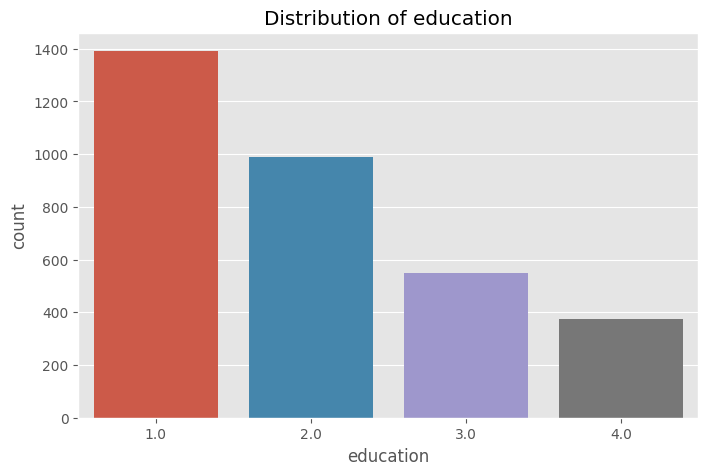

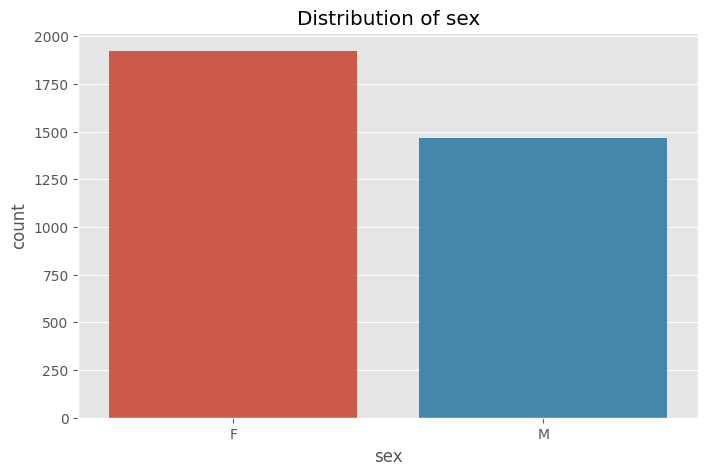

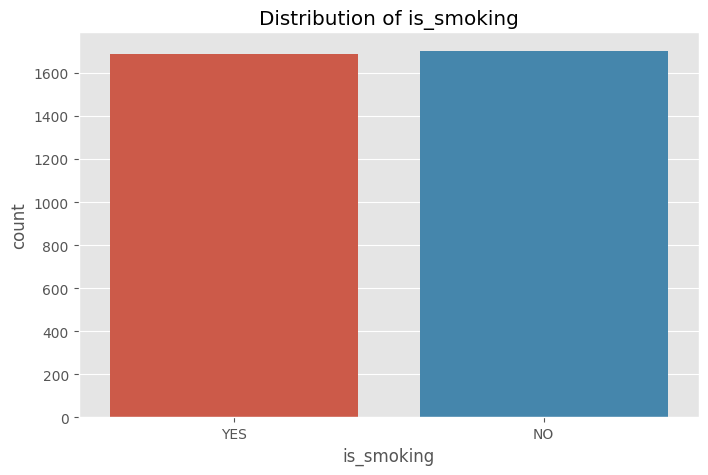

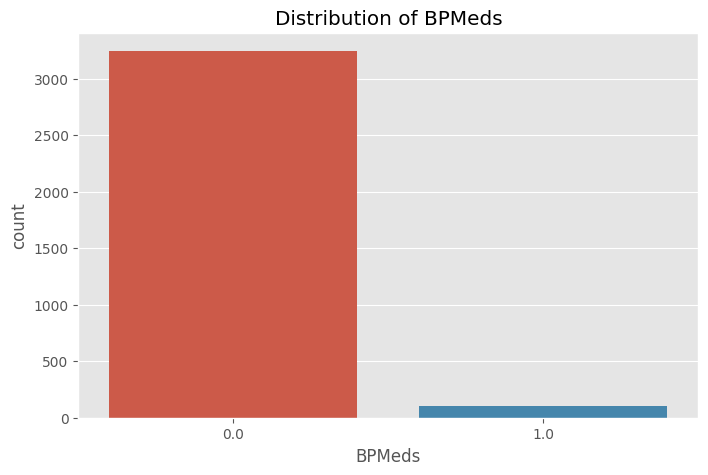

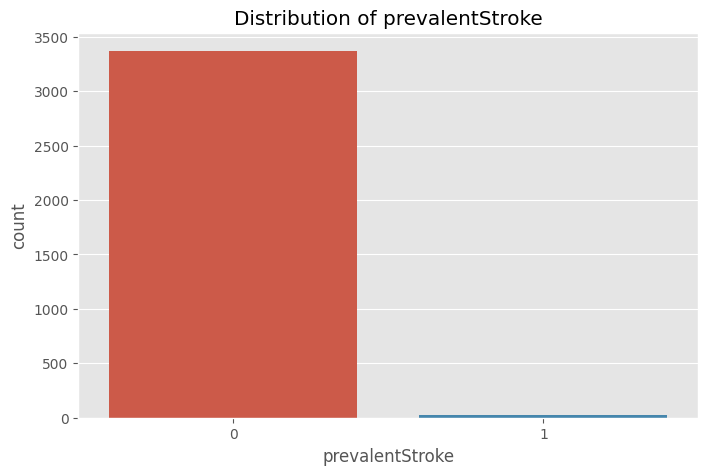

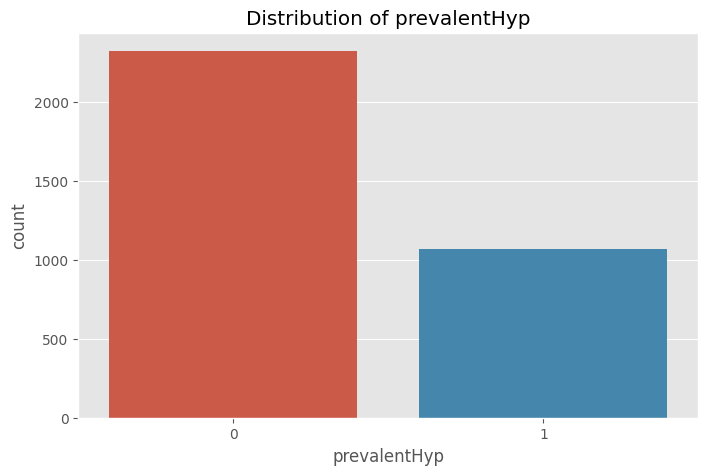

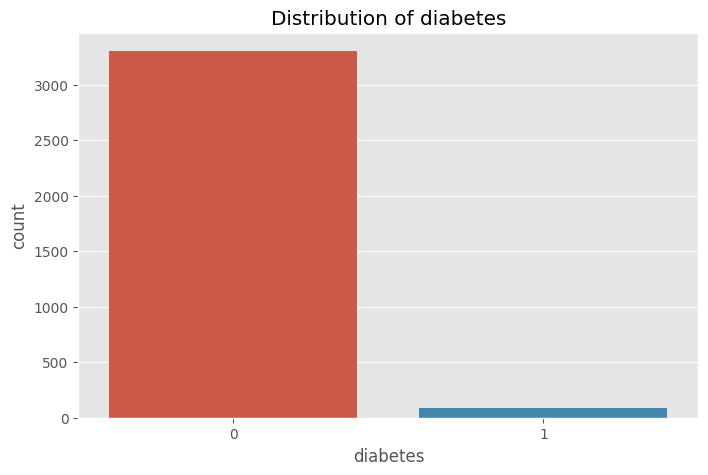

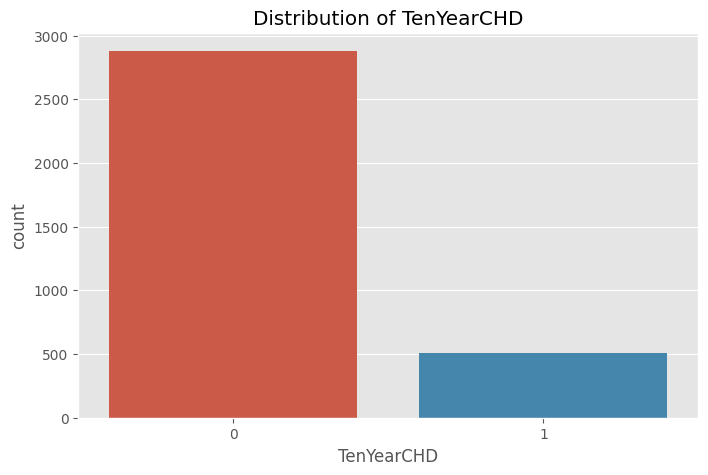

In [22]:
# Chart - 3 visualization code

# Distribution of categorical variables
for col in cat_variables:
  plt.figure(figsize=(8,5))
  sns.countplot(x=col,data=df)
  plt.title("Distribution of "+col)
  plt.show()

##### 1. Why did you pick the specific chart?

Here we have analysed the distribution of categorical variables, all of these categorical variables are demographic variables, we want to look into the distribution of these categorical variables.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are 7 categorical variables each of them provide some insight.
* From the distribution of education we infer that there are lot of people with education qualification of 1, less many people with education qualification of 4.
* From the distribution of sex variable we that there are more females than males.
* From the distribution of number of people smoking we see that there are equal number of people who smoke and who don't smoke.
* From the distribution of BP meds we see that there are very few people who take BP medication.
* From distribution of prevalent stroke we that that there are few people who suffer from prevalent stroke
* From distribution of prevalent hypertension we that that there are good number of people who suffer from prevalent hypertension but it is less than the number of people who don't suffer from prevalent hypertension.
* There are very few people who are diabetic.

#### Chart - 4

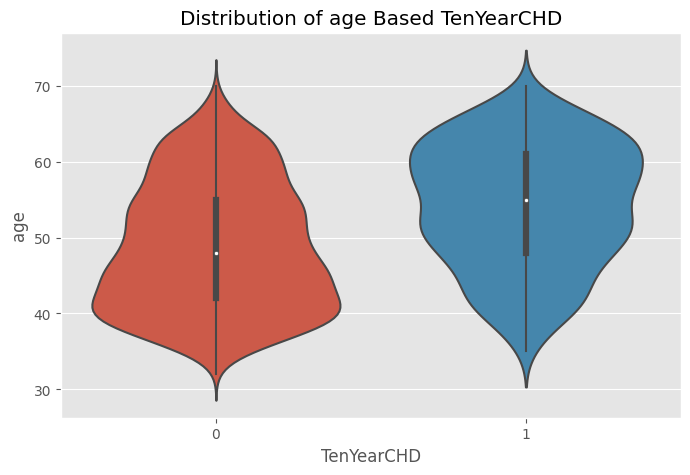

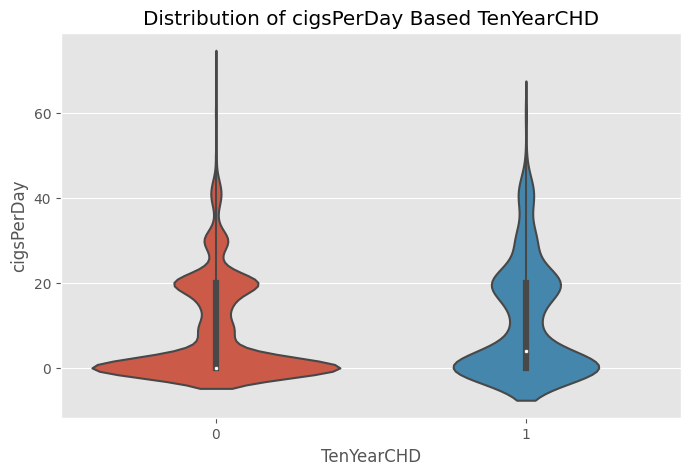

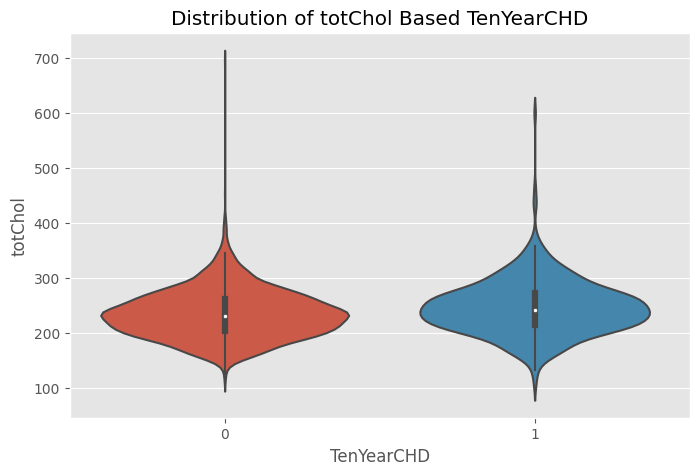

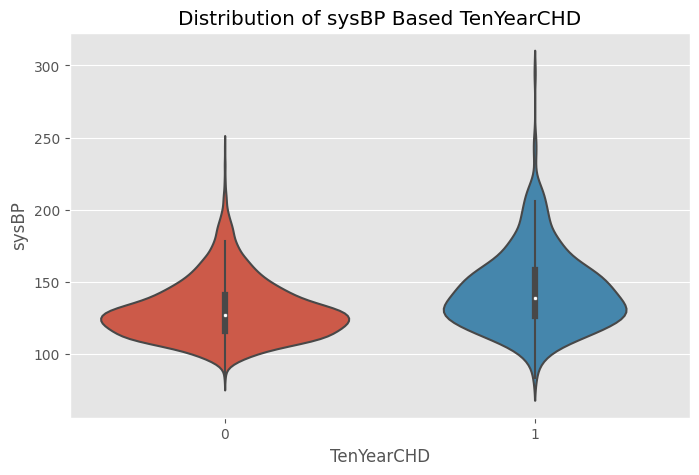

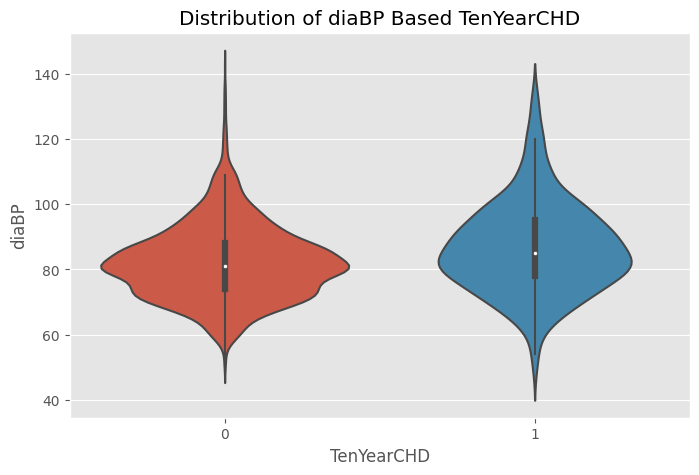

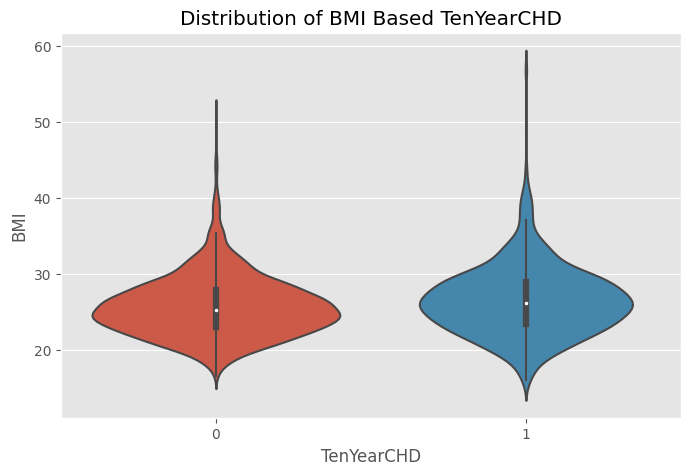

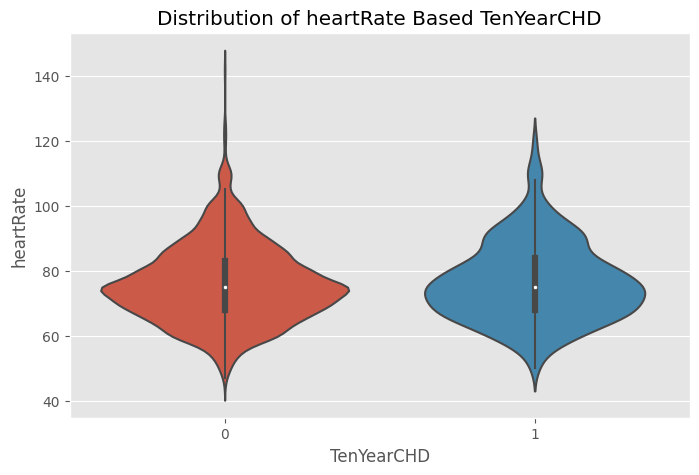

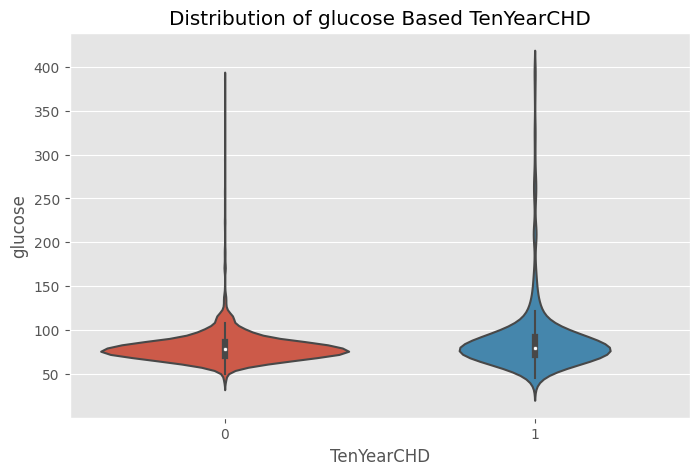

In [23]:
# Chart - 4 visualization code

# Distribution of numeric variables based on target variable
for col in num_variables:
  plt.figure(figsize=(8,5))
  sns.violinplot(x ='TenYearCHD', y = col, data = df)
  plt.title("Distribution of "+col +" Based TenYearCHD")

##### 1. Why did you pick the specific chart?

Here we are doing bivariate analysis of target variable with respect to various numeric variables, a violin plot is the best method to unserstand the relation between these two variables.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the above chart are:
* People with age around 60 have high risk of getting CHD(cornary heart disease)
* People with choestrol around 250 have high risk of getting CHD
* People with Sys BP around 125 have high risk of getting CHD
* People with dia BP of around 80 have high risk of getting CHD
* people with high risk of getting CHD have BMI around 25
* people with high risk of CHD have glucode level around 60

#### Chart - 5

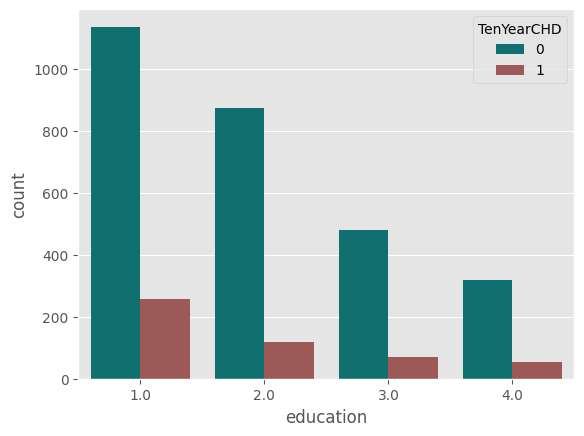

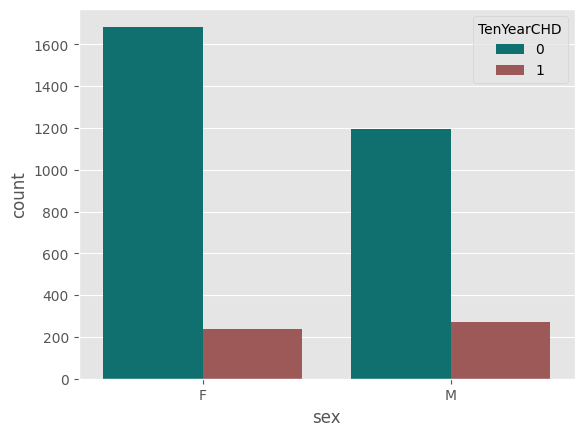

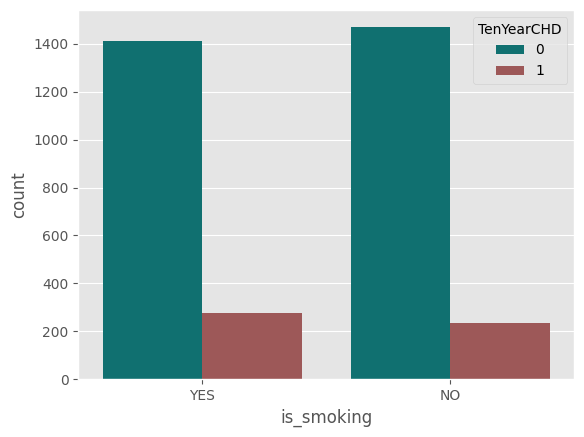

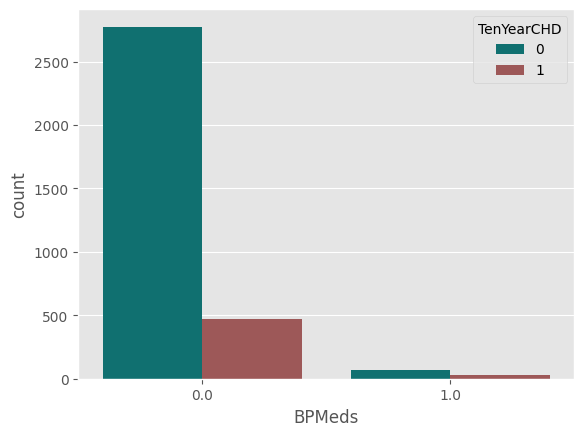

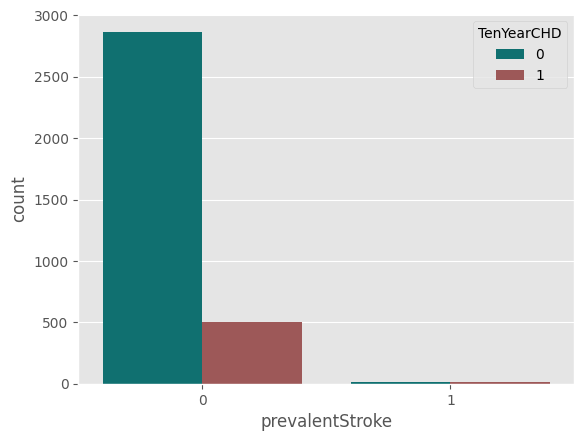

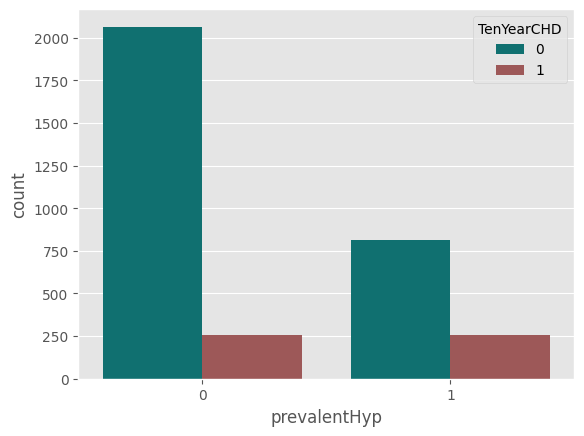

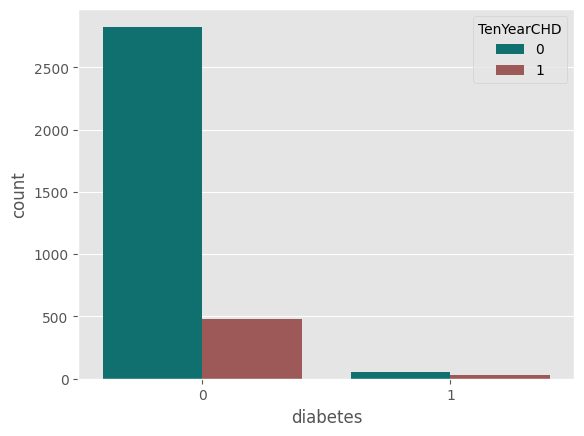

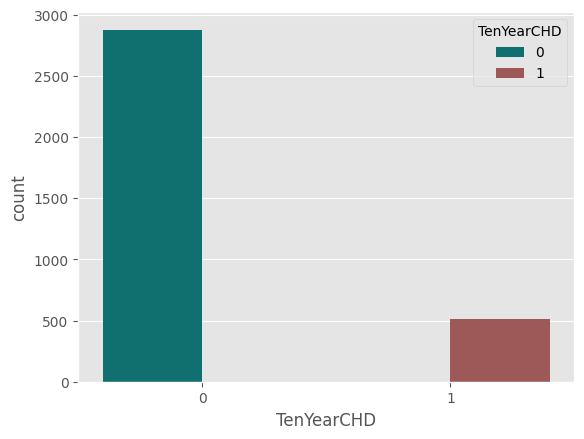

In [24]:
# Chart - 5 visualization code
# categorical variable vs target variable

palette={0:'teal',1:'#a94c4c'}
for col in cat_variables:
  plt.figure()
  sns.countplot(x=col,data=df,hue=df['TenYearCHD'],palette=palette)


##### 1. Why did you pick the specific chart?

In this charts we have done a bivariate analysis between categorical variables and our target variables using a bar plot to understand the behaviour of our categorical variables wrt target variable.

##### 2. What is/are the insight(s) found from the chart?

There are some insights which are found from above chart:
* Both male and female have equal number of CHD, suggesting that CHD is not gender specific.
* Equal number of people who smoke and people who don't smoke are affected by CHD, which might suggest that smoking does not cause CHD.
* 50 percent of the people who are in a risk of CHD suffere from prevelent hypertension.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From this insights we get an idea how demographics variables such as gender, age,education etc are related to CHD, we can create more awareness while spreading this information.

#### Chart - 6

In [25]:
# Chart - 6 visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [26]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [27]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [28]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [29]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [30]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [31]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [32]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

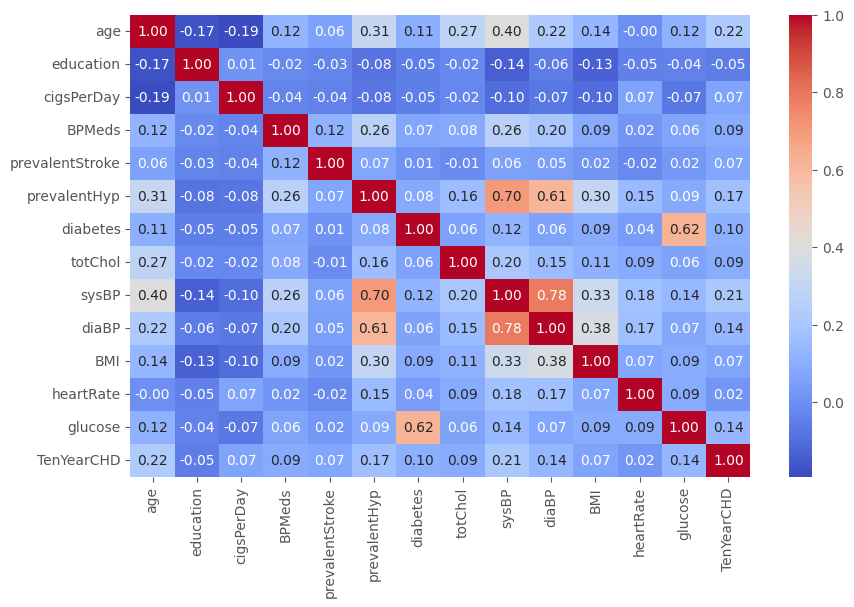

In [33]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True,fmt='0.2f')
plt.show()

##### 1. Why did you pick the specific chart?

We picked this chart to understand the correlation between our variables, we don't want high multicolinearity between our variables as this can affect our ML models performance.

##### 2. What is/are the insight(s) found from the chart?

From the above charts we found that variables SysBP and DiaBP have high correlation, we also found variables glucose and diabetes have high correlation.

#### Chart - 15 - Pair Plot

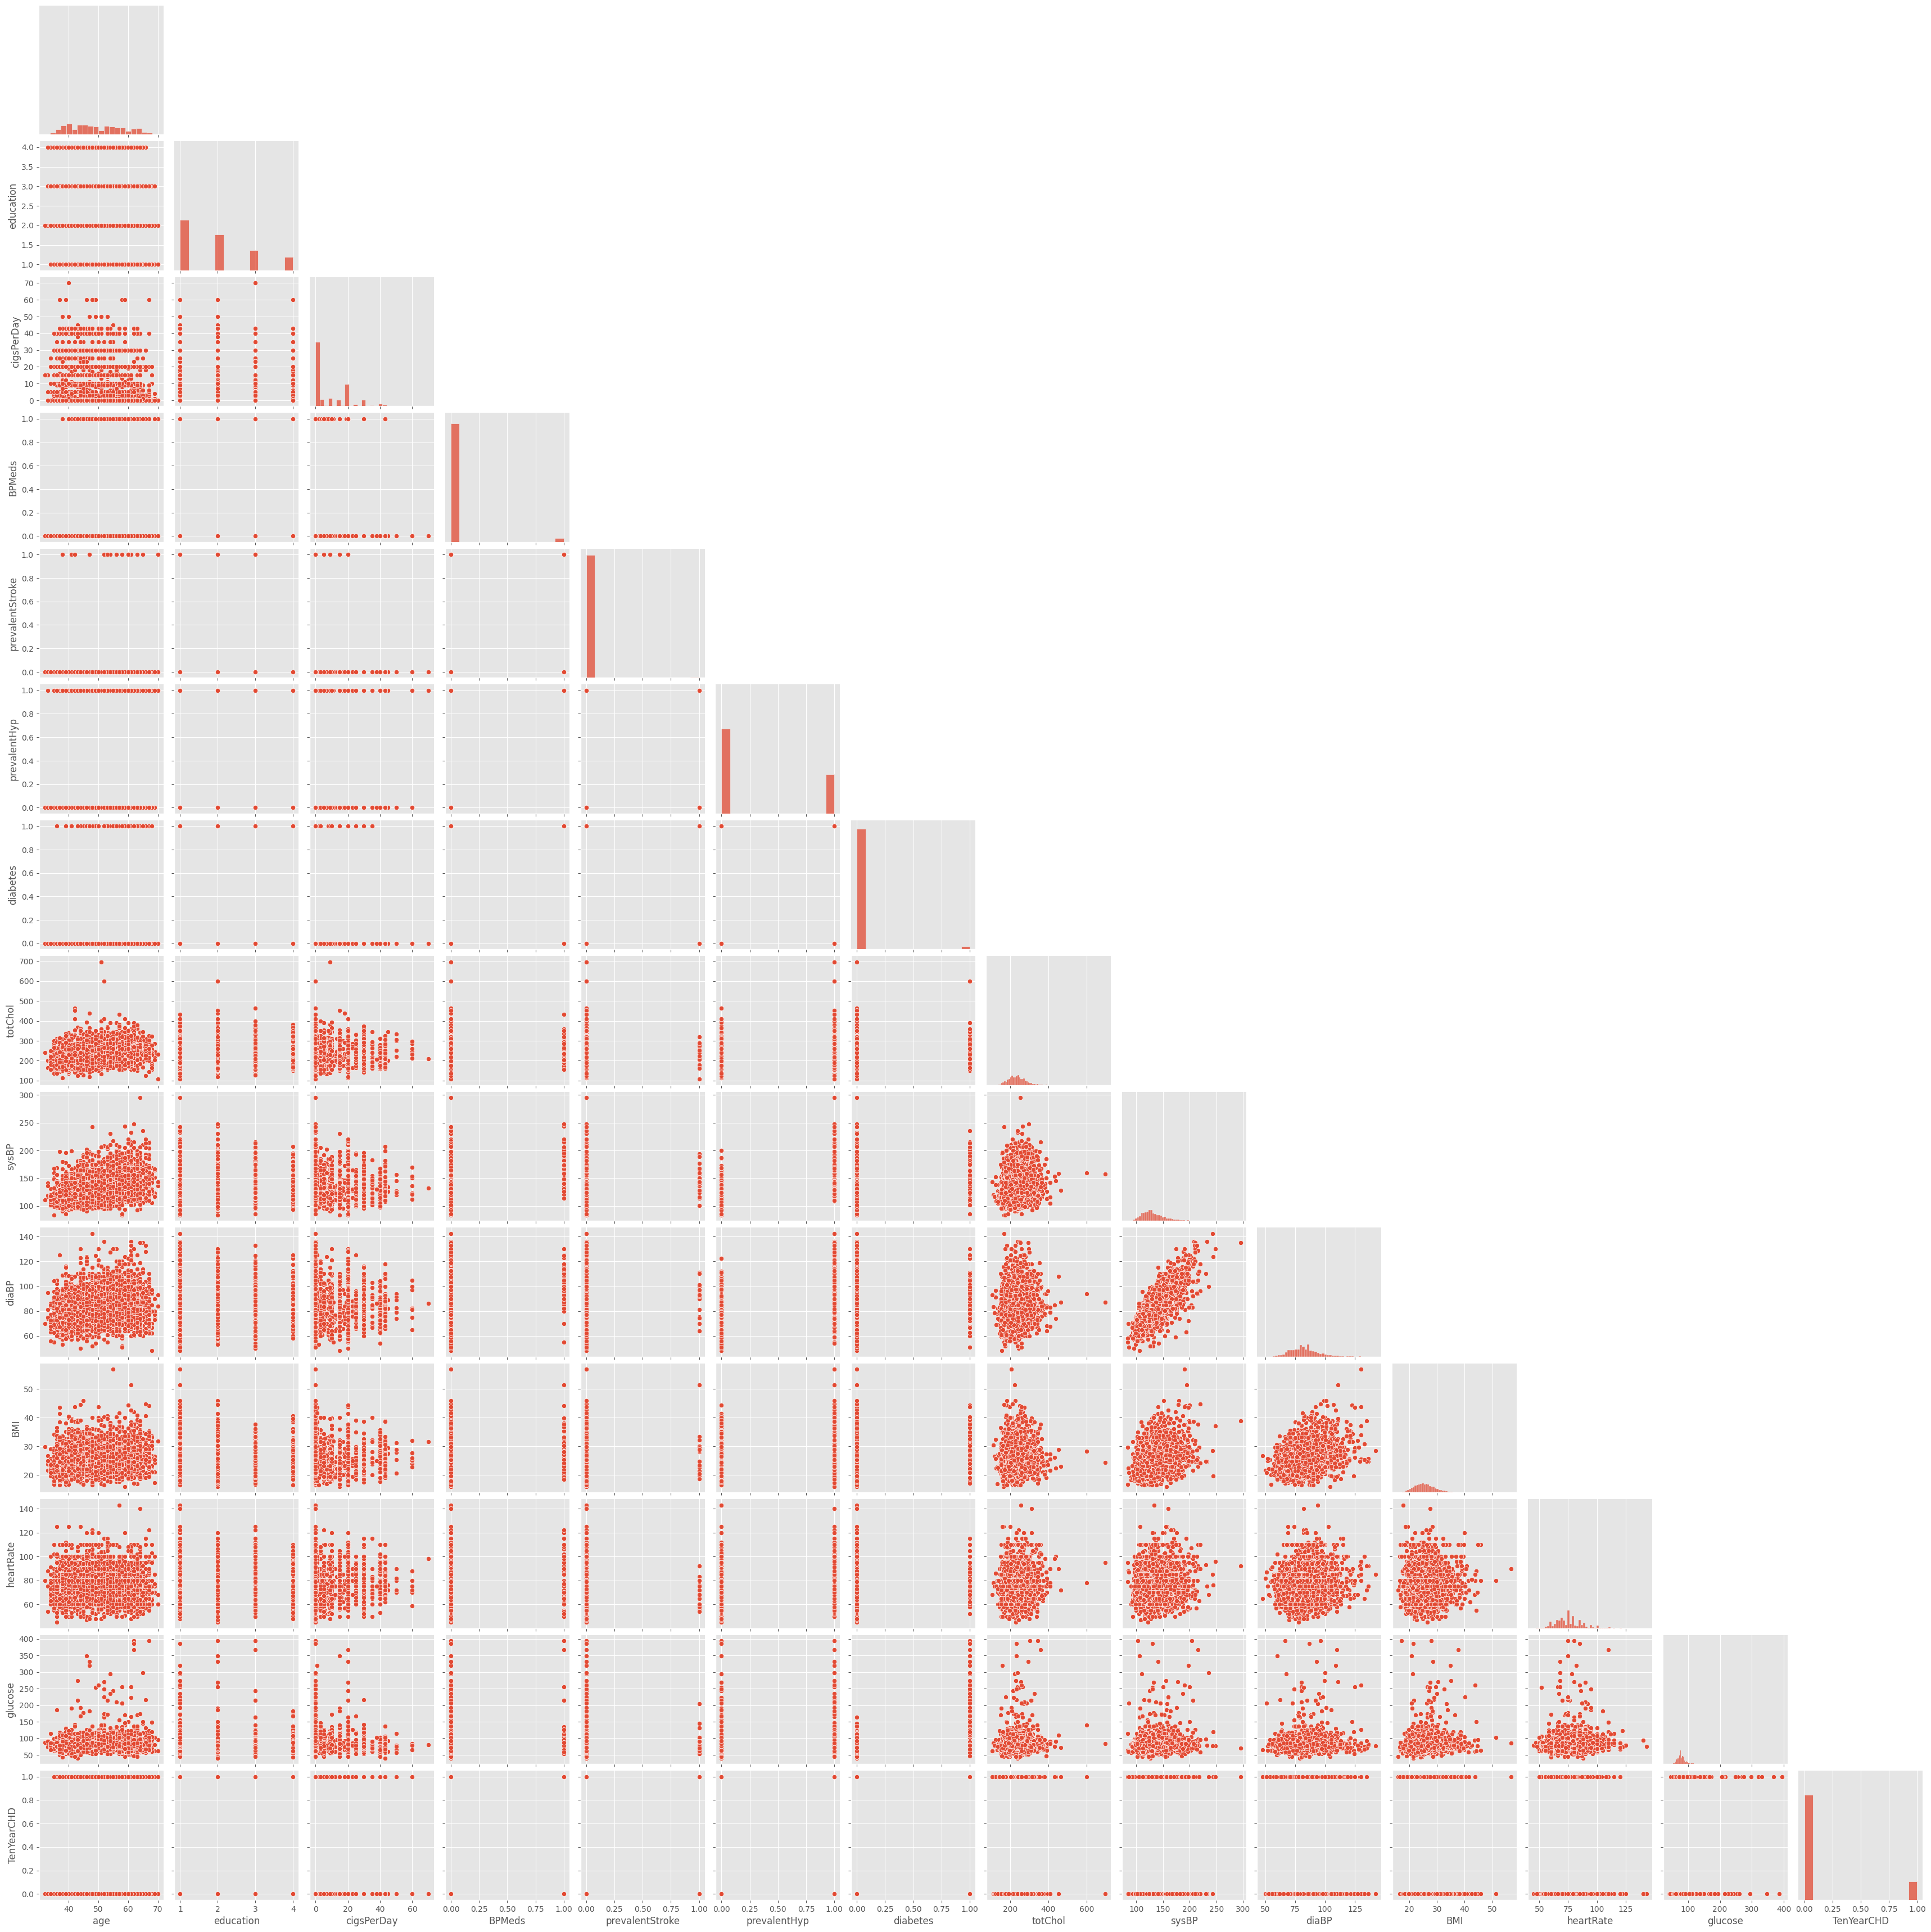

In [34]:
# Pair Plot visualization code
sns.pairplot(df,corner=True)

##### 1. Why did you pick the specific chart?

We have done multivariate analysis to understand relationship between each variables.

##### 2. What is/are the insight(s) found from the chart?

We find that variables SysBP and diaBP have linear relationship, which we also found in correlation plot.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

We define three Hypothetical statements
1. There is no association between education and CHD.
2. There is no association between gender and CHD.
3. There is no association between smoking and CHD.

* Here we have significance leel of 0.05.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis H0: There is no association between education and CHD
Alternative Hypothesis H1: There is association between education and CHD

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value
cross_tab=pd.crosstab(df['education'],df['TenYearCHD'])
stat,p_value,dof,expected = chi2_contingency(cross_tab)
print(cross_tab)
print(f"The p_value obtained is {p_value}")

TenYearCHD     0    1
education            
1.0         1135  256
2.0          872  118
3.0          479   70
4.0          319   54
The p_value obtained is 6.038646749234552e-05


##### Which statistical test have you done to obtain P-Value?

We have done chi2 test to obtain p_value, the p_value obtained is way below our significance value of 0.05, hence we reject our null hypothesis that there is no association between education and CHD.

##### Why did you choose the specific statistical test?

We chose chi2 test, it is test which performs on categorical values, and tells us dependency of these categorical values.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is no association between gender and CHD
H1: There is association between gender and CHD

#### 2. Perform an appropriate statistical test.

In [36]:
# Perform Statistical Test to obtain P-Value
cross_tab=pd.crosstab(df['sex'],df['TenYearCHD'])
stat,p_value,dof,expected = chi2_contingency(cross_tab)
print(cross_tab)
print(f"The p_value obtained is {p_value}")


TenYearCHD     0    1
sex                  
F           1684  239
M           1195  272
The p_value obtained is 1.060878293561798e-06


##### Which statistical test have you done to obtain P-Value?

We have done chi2 test to obtain p_value, the p_value obtained is way below our significance value of 0.05, hence we reject our null hypothesis that there is no association between gender and CHD.

##### Why did you choose the specific statistical test?

We chose chi2 test, it is test which performs on categorical values, and tells us dependency of these categorical values.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0: There is no association between smoking and CHD.
H1: There is association between smoking and CHD.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value
cross_tab=pd.crosstab(df['is_smoking'],df['TenYearCHD'])
stat,p_value,dof,expected = chi2_contingency(cross_tab)
print(cross_tab)
print(f"The p_value obtained is {p_value}")


TenYearCHD     0    1
is_smoking           
NO          1467  236
YES         1412  275
The p_value obtained is 0.05239062274853224


##### Which statistical test have you done to obtain P-Value?

We have done chi2 test to obtain p_value, the p_value obtained is higher than our significance value of 0.05, hence fail reject our null hypothesis that there is no association between smoking and CHD.

##### Why did you choose the specific statistical test?

We chose chi2 test, it is test which performs on categorical values, and tells us dependency of these categorical values.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [38]:
# Handling Missing Values & Missing Value Imputation

# looking into null values
df.isna().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [39]:
# Handling Missing Values & Missing Value Imputation

# education
df['education']=df['education'].fillna(df['education'].mode()[0])
# BPMeds
df['BPMeds']=df['BPMeds'].fillna(df['BPMeds'].mode()[0])
# totchol
df['totChol']=df['totChol'].fillna(df['totChol'].median())
# BMI
df['BMI']=df['BMI'].fillna(df['BMI'].median())
# HeartRate
df['heartRate']=df['heartRate'].fillna(df['heartRate'].median())

In [40]:
# cigsperday
print("The median of number of cigs per day is:",df['cigsPerDay'].median())
df.loc[df['cigsPerDay'].isna()].head()

The median of number of cigs per day is: 0.0


age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
422   55        1.0   F        YES         NaN     0.0                0   
466   45        3.0   M        YES         NaN     0.0                0   
469   42        1.0   M        YES         NaN     0.0                0   
491   61        1.0   F        YES         NaN     0.0                0   
538   41        1.0   F        YES         NaN     0.0                0   

     prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
422             1         0    213.0  163.0   91.0  28.66       69.0     66.0   
466             1         0    170.0  145.5   99.0  26.74       83.0     85.0   
469             0         0    196.0  123.0   73.0  22.06       66.0      NaN   
491             1         0    356.0  168.0   98.0  27.30      103.0    106.0   
538             0         0    171.0  135.0   82.5  24.35       79.0     82.0   

     TenYearCHD  
422           0  
466           0  
469           0  
491           0  
538           0

If we look into nan values in 'cigsPerDay' column we see that the person is smoking it does not make sense to replace the nan values with median as median is zero.

In [41]:
# cigsperday
median_cigs=df.loc[df['is_smoking']=='YES']['cigsPerDay'].median()
df['cigsPerDay']=df['cigsPerDay'].fillna(median_cigs)

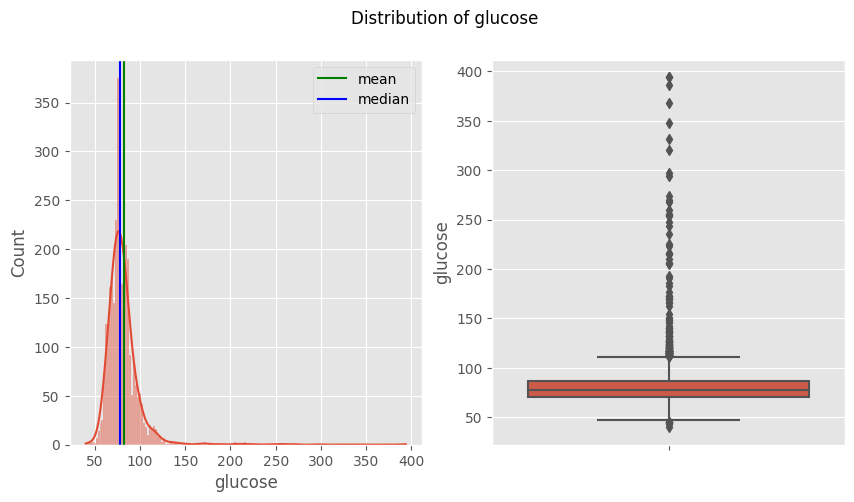

In [42]:
# glucose levels
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['glucose'],kde=True,ax=ax[0])
ax[0].axvline(df['glucose'].mean(),label='mean',color='green')
ax[0].axvline(df['glucose'].median(),label='median',color='blue')
ax[0].legend()
sns.boxplot(y=df['glucose'],ax=ax[1])
fig.suptitle("Distribution of glucose")
plt.show()

There are many outliers in glucose column, the distribution is right skewed.  There are large numbers of nan values and replacing them with median will change the distribution and will give bad results, so we replace them using **knn imputer** .

In [43]:
# converting object into numeric variables
df['is_smoking']=df['is_smoking'].apply(lambda x: 1 if x=='YES' else 0)
df['sex']=df['sex'].apply(lambda x: 1 if x=='M' else 0)

In [44]:
# applying knn imputation in glucose levels
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=8)
imputer.fit(df)
imputed_values=imputer.transform(df)
df=pd.DataFrame(imputed_values,columns=df.columns)

#### What all missing value imputation techniques have you used and why did you use those techniques?

In [45]:
continious_var=num_variables.copy()

In [46]:
continious_var

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [47]:
cat_variables

['education',
 'sex',
 'is_smoking',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'TenYearCHD']

### 2. Feature Manipulation & Selection

In [48]:
chd_df=df.copy()

#### 1. Feature Manipulation

In [49]:
num_variables=list(chd_df.describe().columns)
num_variables

['age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

In [50]:
chd_df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<Axes: >

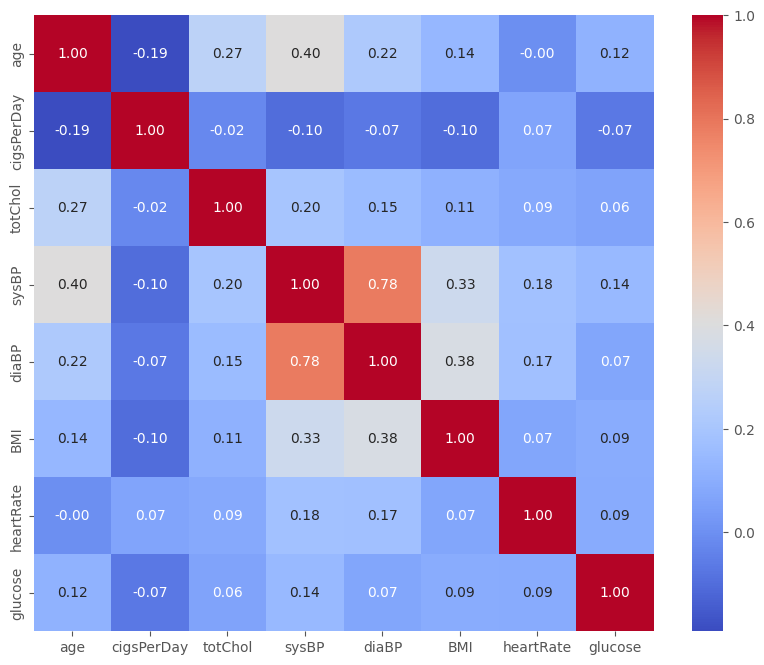

In [51]:
# Manipulate Features to minimize feature correlation and create new features

# correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(chd_df[continious_var].corr(),cmap='coolwarm',annot=True,fmt='0.2f')

In [52]:
# Vif method
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X):
  vif_df=pd.DataFrame()
  vif_df['Variables']=X.columns
  vif_df['VIF']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
  return vif_df



In [53]:
vif(chd_df[[col for col in continious_var if col not in ['TenYearCHD']]])

Variables         VIF
0         age   40.145988
1  cigsPerDay    1.628626
2     totChol   29.914435
3       sysBP  109.182022
4       diaBP  124.189031
5         BMI   43.144559
6   heartRate   35.319259
7     glucose   13.512159

In [54]:
# not including 'DiaBP'
chd_df['pulse_pressure']=(chd_df['sysBP']-chd_df['diaBP'])
num_variables.append('pulse_pressure')
continious_var.append('pulse_pressure')
vif(chd_df[[col for col in continious_var if col not in ['TenYearCHD','diaBP','sysBP','is_smoking']]])

Variables        VIF
0             age  38.897684
1      cigsPerDay   1.625941
2         totChol  29.396186
3             BMI  33.895938
4       heartRate  32.091242
5         glucose  13.494721
6  pulse_pressure  15.462663

In [55]:
#continious_var.remove(['sysBP','diaBP'])
continious_var=[i for i in continious_var if i not in['sysBP','diaBP']]

In [56]:
continious_var

['age',
 'cigsPerDay',
 'totChol',
 'BMI',
 'heartRate',
 'glucose',
 'pulse_pressure']

<Axes: >

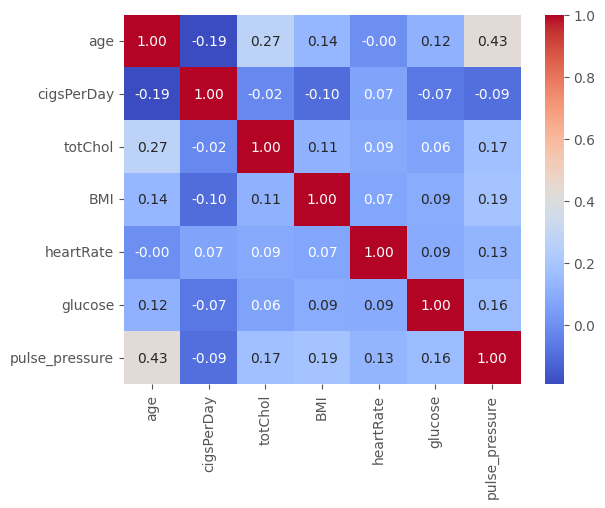

In [57]:
# looking into updated correlation plot
sns.heatmap(chd_df[continious_var].corr(),cmap='coolwarm',annot=True,fmt='0.2f')

#### 2. Feature Selection

In [58]:
# Select your features wisely to avoid overfitting
chd_df.drop(['is_smoking','sysBP','diaBP'],axis=1,inplace=True)


In [59]:
chd_df.shape

(3390, 14)

In [60]:
chd_df.columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'pulse_pressure'],
      dtype='object')

##### What all feature selection methods have you used  and why?

* We have used VIF method to reduce the number of multicollinear features, we have found that sysBP and diaBP are correlated we removed this features and added new feature Pulse pressure to describe the working of these two features.

* We have also removed 'is_smoking' as this feature and feature cigsPerDay mean the same thing.

##### Which all features you found important and why?

The features which we found important are 'age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'education, 'Pulse pressure', 'sex_M', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes' as these variables are not correlated to each other and contain important information which will able to predict the risk of patient getting a CHD.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

All the continious variables distribution looks fine now let us look into discrete variables distribution.

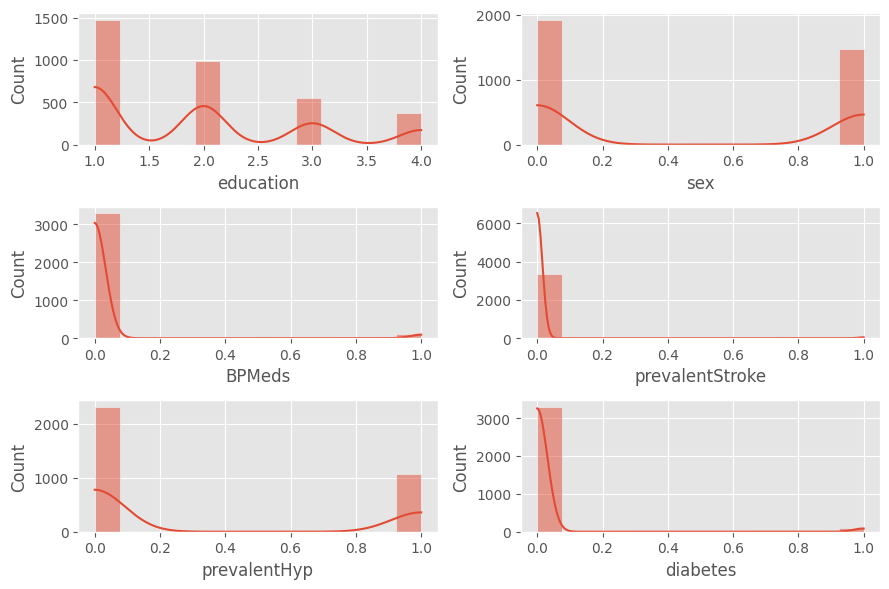

In [61]:
# Transform Your data
discrete_var=[i for i in cat_variables if i not in ['is_smoking','TenYearCHD']]
fig,ax=plt.subplots(3,2,figsize=(9,6))
for i,col in enumerate(discrete_var):
  plt.subplot(3,2,i+1)
  sns.histplot(chd_df[col],kde=True)
  plt.tight_layout()


From the plots we see that the distribution is skewed, let us see the skewness

In [62]:
# calculating skewness
chd_df[continious_var].skew()

age               0.225796
cigsPerDay        1.204077
totChol           0.948170
BMI               1.025551
heartRate         0.676660
glucose           6.340102
pulse_pressure    1.412382
dtype: float64

In [63]:
# applying log transformation to it
np.log10(chd_df[continious_var]+1).skew()

age              -0.015053
cigsPerDay        0.275072
totChol           0.011860
BMI               0.370422
heartRate         0.165898
glucose           2.304034
pulse_pressure    0.354174
dtype: float64

From log transformation we are able to reduce some skewness

In [64]:
# transforming the data
for col in continious_var:
  chd_df[col]=np.log10(chd_df[col]+1)

chd_df[continious_var].skew()

age              -0.015053
cigsPerDay        0.275072
totChol           0.011860
BMI               0.370422
heartRate         0.165898
glucose           2.304034
pulse_pressure    0.354174
dtype: float64

### 3. Categorical Encoding

In [65]:
# let us make copy of original dataframe


In [66]:
# Encode your categorical columns
#print(df.describe(include=['object']).columns) # categorical columns
#print(cat_variables)


#### What all categorical encoding techniques have you used & why did you use those techniques?

We have used One Hot Encoding to all the categorical variables, and the dropped the first variable to avoid dummy variable trap.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Here we already reduced the features, no further reduction of features is needed.

### 8. Data Splitting

In [67]:
X=chd_df.drop('TenYearCHD',axis=1)
y=chd_df['TenYearCHD']

In [68]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True)

In [69]:
y_train.value_counts()/y_train.shape[0]

0.0    0.849136
1.0    0.150864
Name: TenYearCHD, dtype: float64

In [70]:
y_test.value_counts()/y_test.shape[0]

0.0    0.849558
1.0    0.150442
Name: TenYearCHD, dtype: float64

##### What data splitting ratio have you used and why?

I have used 70:30 ratio on Train and Test data, as the data is highly imbalanced, in order to get a good proportion of both the labels i have done stratified train test splitting.

### 2. Handling Outliers

In [71]:
continious_var

['age',
 'cigsPerDay',
 'totChol',
 'BMI',
 'heartRate',
 'glucose',
 'pulse_pressure']

In [72]:
# Handling Outliers & Outlier treatments
for num_col in continious_var:
  Q1=chd_df[num_col].quantile(0.25)
  Q3=chd_df[num_col].quantile(0.75)
  iqr=Q3-Q1
  upper_limit=Q3+1.5*iqr
  lower_limit=Q1-1.5*iqr
  chd_df[num_col]=chd_df[num_col].apply(lambda x: upper_limit if x>upper_limit else lower_limit if x<lower_limit else x) # here we set high value to upper limit and low values to lower limit

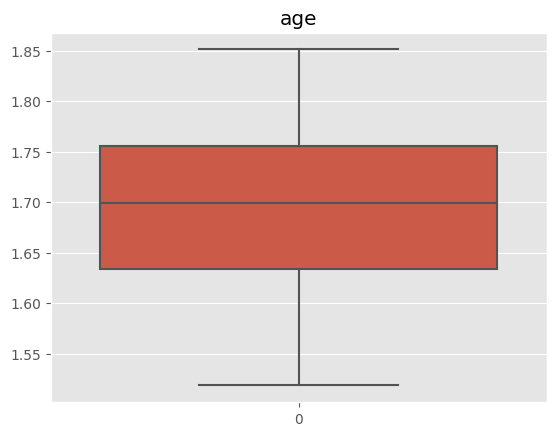

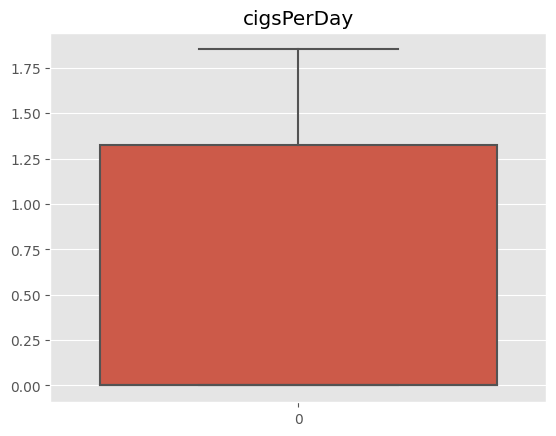

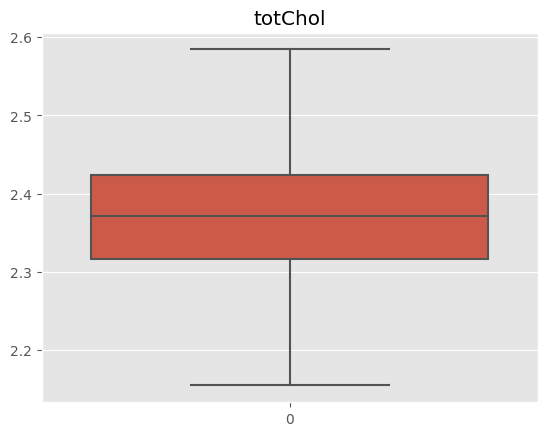

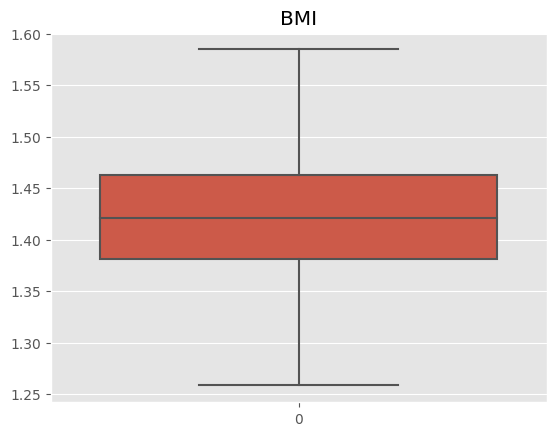

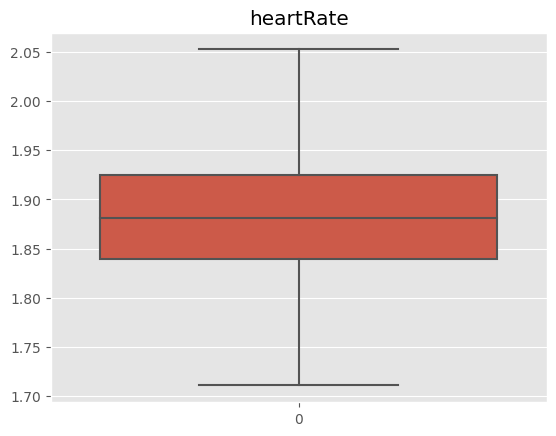

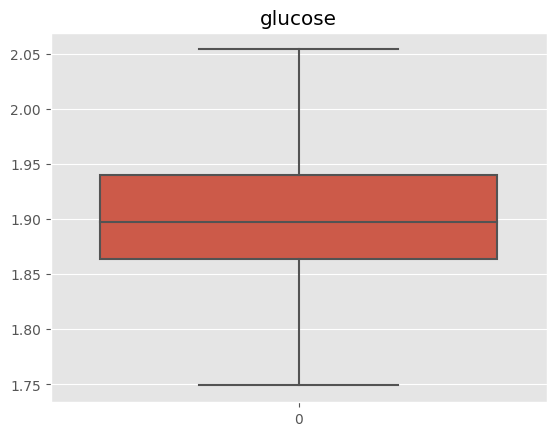

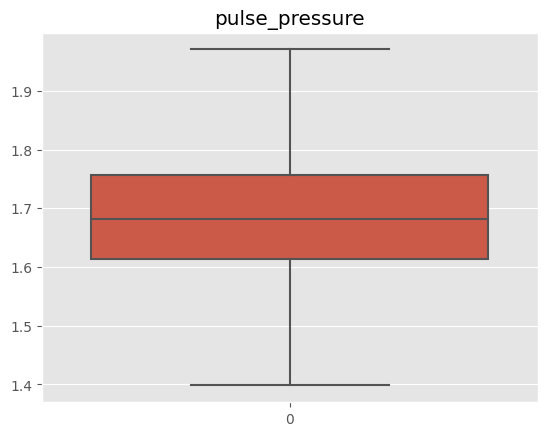

In [73]:
for col in continious_var:
  plt.figure()
  sns.boxplot(chd_df[col])
  plt.title(col)

In [74]:
chd_df.shape

(3390, 14)

In [75]:
chd_df.columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'pulse_pressure'],
      dtype='object')

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have used IQR method for outlier treatment where we set an upper_limit and lower limit, for values higher than upper_limit replace them with upper_limit, similar method for values lower than lower_limit.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes the data is imbalanced as there very few people in the data set who have been labelled as 1, i.e, risk of getting a CHD

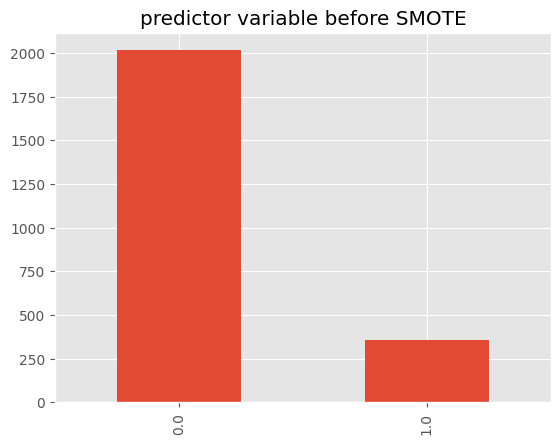

In [76]:
# before handling imbalanced data
y_train.value_counts().plot.bar(title='predictor variable before SMOTE')
plt.show()

In [77]:
# Handling Imbalanced Dataset (If needed)
smt = SMOTETomek(random_state=42)
X_res_tr, y_res_tr = smt.fit_resample(X_train, y_train)

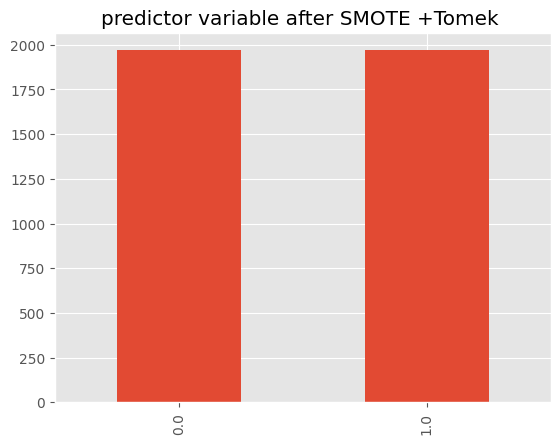

In [78]:
y_res_tr.value_counts().plot.bar(title='predictor variable after SMOTE +Tomek ')
plt.show()

In [79]:
print("The shape of resampled train data",X_res_tr.shape)

The shape of resampled train data (3938, 13)


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

We have used SMOTE along with Tomek links to handle imbalance dataset, we have used tomek links to improve our classification strength and SMOTE to handle the imbalance dataset.

### 2. Scaling Data

In [80]:
scaler=StandardScaler()

# transforming train data
X_res_scaled_tr=scaler.fit_transform(X_res_tr)

# transforming test data
X_scaled_tst=scaler.fit_transform(X_test)

##### What all outlier treatment techniques have you used and why did you use those techniques?

We have used IQR method for outlier treatment where we set an upper_limit and lower limit, for values higher than upper_limit replace them with upper_limit, similar method for values lower than lower_limit.

## ***7. ML Model Implementation***

In [81]:
# ML model function to calculate scores
def model_scores(model,X_train,X_test,y_train,y_test):
  model.fit(X_train,y_train) # fitting the model

  y_pred_tr=model.predict(X_train) # predicted train labels
  y_pred_tst=model.predict(X_test) # predicted test labels

  try:
    y_prob_tr=model.predict_proba(X_train)[:,1] # probability va;ues for train
    y_prob_tst=model.predict_proba(X_test)[:,1] # probability values for test
  except:
    pass

  # calculating roc_auc scores
  roc_auc_tr=roc_auc_score(y_train,y_prob_tr)
  roc_auc_tst=roc_auc_score(y_test,y_prob_tst)
  print(" ROc-AUC score for train data is", roc_auc_tr)
  print(" ROC-AUC score for test data is",roc_auc_tst)

  # plotting roc_auc curve
  fpr_tr,tpr_tr,thresholds_tr=roc_curve(y_train,y_prob_tr)   # roc_curve for train
  fpr_tst,tpr_tst,thresholds_tst=roc_curve(y_test,y_prob_tst) # roc_curve for test
  plt.plot(fpr_tr,tpr_tr,label='roc_auc curve for train')
  plt.plot(fpr_tst,tpr_tst,label='roc_curve for test')
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.legend()
  plt.show()

  # plotting confusion matrix for train and test data.
  cm_train=confusion_matrix(y_train,y_pred_tr)
  cm_test=confusion_matrix(y_test,y_pred_tst)

  fig,ax=plt.subplots(1,2,figsize=(10,5))
  # cm for train data
  sns.heatmap(cm_train,annot=True,xticklabels=['False','True'],yticklabels=['False','True'],ax=ax[0],fmt='.0f')
  ax[0].set_xlabel("Predicted labels")
  ax[0].set_ylabel("True labels")
  ax[0].set_title("Confusion matrix for Train Data")

  # cm for test data
  sns.heatmap(cm_test,annot=True,xticklabels=['False','True'],yticklabels=['False','True'],ax=ax[1],fmt='.0f')
  ax[1].set_xlabel("Predicted labels")
  ax[1].set_ylabel("True labels")
  ax[1].set_title("Confusion matrix for Test Data")
  plt.show()

  # classification report
  target_names=[0,1]
  clr_tr=classification_report(y_train,y_pred_tr,target_names=target_names,output_dict=True)
  clr_tst=classification_report(y_test,y_pred_tst,target_names=target_names,output_dict=True)
  clr_tr_df=pd.DataFrame(clr_tr).T
  clr_tst_df=pd.DataFrame(clr_tst).T
  print("\n\nThe classification report for train data is:\n\n",clr_tr_df)
  print("\n\nThe classification report for test data is:\n\n",clr_tst_df)

  # calculating all scores and storing it in a list
  precision_train=clr_tr['macro avg']['precision']
  precision_tst=clr_tst['macro avg']['precision']

  recall_tr=clr_tr[1]['recall']
  recall_tst=clr_tst[1]['recall']

  acc_tr=accuracy_score(y_train,y_pred_tr)
  acc_tst=accuracy_score(y_test,y_pred_tst)

  f1_tr=clr_tr['macro avg']['f1-score']
  f1_tst=clr_tst['macro avg']['f1-score']

  model_metric=[precision_train,precision_tst,recall_tr,recall_tst,roc_auc_tr,roc_auc_tst,acc_tr,acc_tst,f1_tr,f1_tst]

  return model_metric






















In [158]:
X.columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'pulse_pressure'],
      dtype='object')

In [156]:
xgb_optimal.feature_importances_

array([0.11553033, 0.03756899, 0.17768253, 0.11153794, 0.03722887,
       0.02063795, 0.13745365, 0.04549049, 0.04637729, 0.03212755,
       0.11237661, 0.05313481, 0.07285299], dtype=float32)

In [182]:
# plotting feature importance
def feature_importances(model,names,model_name):
  importances=np.array(model.feature_importances_)
  feature_names=np.array(names)
  data={'feature_names':feature_names,'feature_importances':importances}
  fi_df=pd.DataFrame(data)
  fi_df.sort_values(by=['feature_importances'],ascending=False,inplace=True)
  sns.barplot(y=fi_df['feature_names'],x=fi_df['feature_importances'])
  plt.title(model_name + ' feature importance')
  plt.xlabel("Feature importances")
  plt.ylabel("Feature names")



## Logistic Regression

In [82]:
# ML Model - 1 Implementation
log_reg=LogisticRegression(fit_intercept=True,max_iter=10000)


In [83]:
# defing dataframe to store ml models performance metrics
model_df=pd.DataFrame(index=['precision_train','precision_test','recall_train','recall_test','roc_auc_train','roc_auc_test','accuracy_train','accuracy_test','f1_train','f1_test'])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 ROc-AUC score for train data is 0.7406569217487615
 ROC-AUC score for test data is 0.7301803437424352


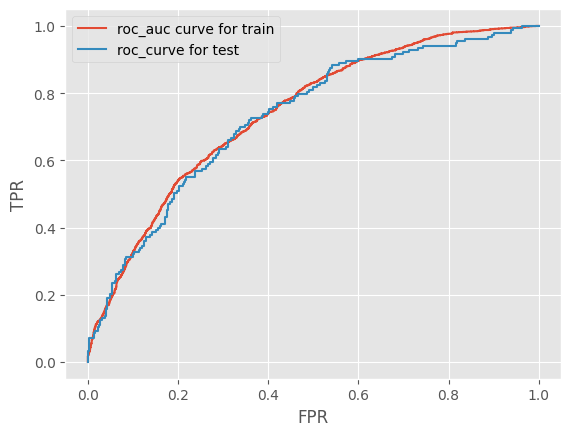

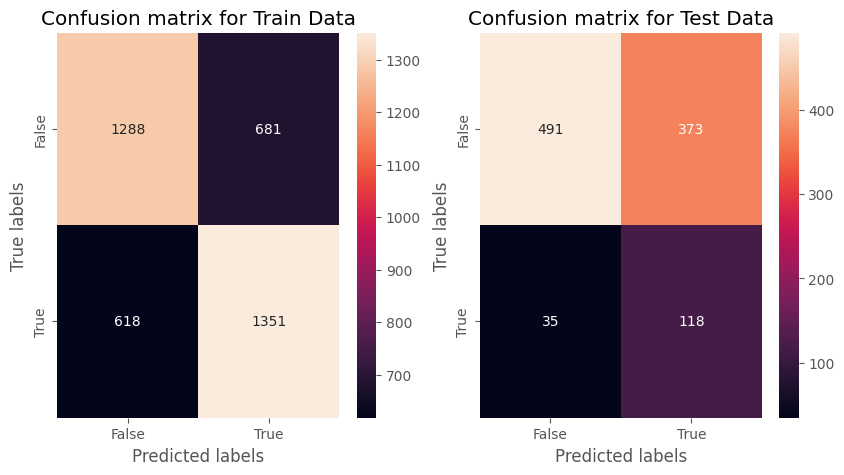



The classification report for train data is:

               precision    recall  f1-score      support
0              0.675761  0.654139  0.664774  1969.000000
1              0.664862  0.686135  0.675331  1969.000000
accuracy       0.670137  0.670137  0.670137     0.670137
macro avg      0.670311  0.670137  0.670053  3938.000000
weighted avg   0.670311  0.670137  0.670053  3938.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.933460  0.568287  0.706475   864.00000
1              0.240326  0.771242  0.366460   153.00000
accuracy       0.598820  0.598820  0.598820     0.59882
macro avg      0.586893  0.669764  0.536467  1017.00000
weighted avg   0.829183  0.598820  0.655322  1017.00000


In [84]:
# Visualizing evaluation Metric Score chart
log_scores=model_scores(log_reg,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [85]:
model_df['Logistic Regression']=log_scores
model_df

Logistic Regression
precision_train             0.670311
precision_test              0.586893
recall_train                0.686135
recall_test                 0.771242
roc_auc_train               0.740657
roc_auc_test                0.730180
accuracy_train              0.670137
accuracy_test               0.598820
f1_train                    0.670053
f1_test                     0.536467

#### 2. Cross- Validation & Hyperparameter Tuning

In [86]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
param_grid={'C':[100,10,1,0.1,0.01,0.001,0.0001]}
log_reg=LogisticRegression(fit_intercept=True,max_iter=10000)
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
log_grid=GridSearchCV(log_reg,param_grid=param_grid,cv=skf,scoring='recall')

# Fit the Algorithm
log_grid.fit(X_res_scaled_tr,y_res_tr)
print(log_grid.best_params_)
log_optimal=log_grid.best_estimator_

# Predict on the model


{'C': 0.01}


 ROc-AUC score for train data is 0.7404495428249085
 ROC-AUC score for test data is 0.7306871822803195


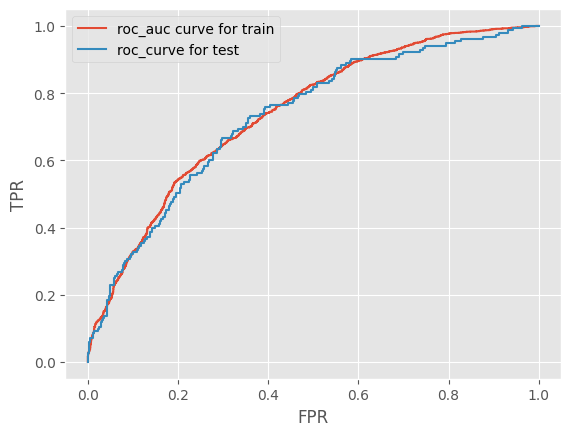

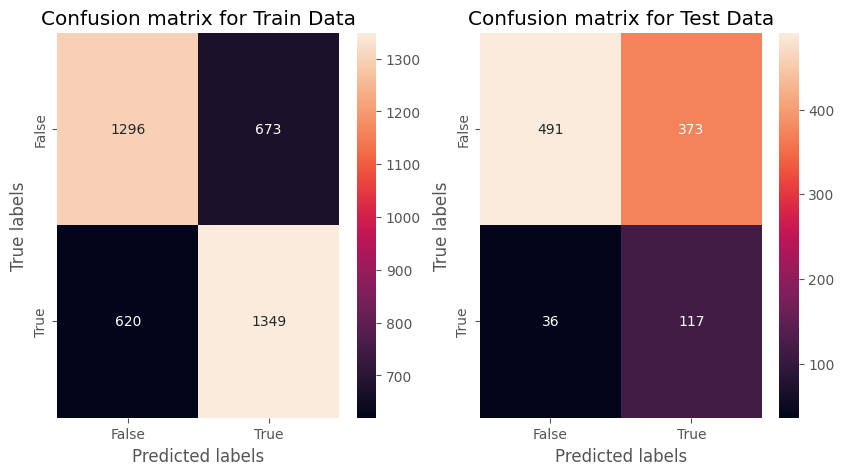



The classification report for train data is:

               precision    recall  f1-score      support
0              0.676409  0.658202  0.667181  1969.000000
1              0.667161  0.685119  0.676021  1969.000000
accuracy       0.671661  0.671661  0.671661     0.671661
macro avg      0.671785  0.671661  0.671601  3938.000000
weighted avg   0.671785  0.671661  0.671601  3938.000000


The classification report for test data is:

               precision    recall  f1-score      support
0              0.931689  0.568287  0.705967   864.000000
1              0.238776  0.764706  0.363919   153.000000
accuracy       0.597837  0.597837  0.597837     0.597837
macro avg      0.585232  0.666496  0.534943  1017.000000
weighted avg   0.827445  0.597837  0.654508  1017.000000


In [87]:
# visualizing metric scores
log_reg_tuned=model_scores(log_optimal,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [88]:
# Evaluation metric score chart
model_df['Logistic Regression tuned']=log_reg_tuned

In [89]:
model_df

Logistic Regression  Logistic Regression tuned
precision_train             0.670311                   0.671785
precision_test              0.586893                   0.585232
recall_train                0.686135                   0.685119
recall_test                 0.771242                   0.764706
roc_auc_train               0.740657                   0.740450
roc_auc_test                0.730180                   0.730687
accuracy_train              0.670137                   0.671661
accuracy_test               0.598820                   0.597837
f1_train                    0.670053                   0.671601
f1_test                     0.536467                   0.534943

##### Which hyperparameter optimization technique have you used and why?

We have used GridSearchCV with different values of 'C' as our hyperparameters.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From evaluation metric score chart we found no significant improvemnt in the preformance of the model.

## Knn

In [90]:
# knn implementation
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 ROc-AUC score for train data is 0.9807902375081926
 ROC-AUC score for test data is 0.5924072561123215


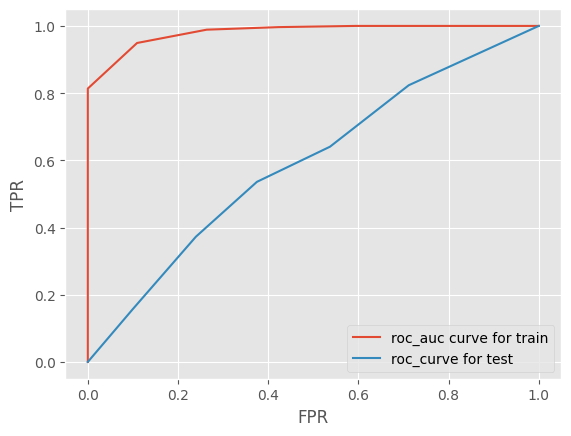

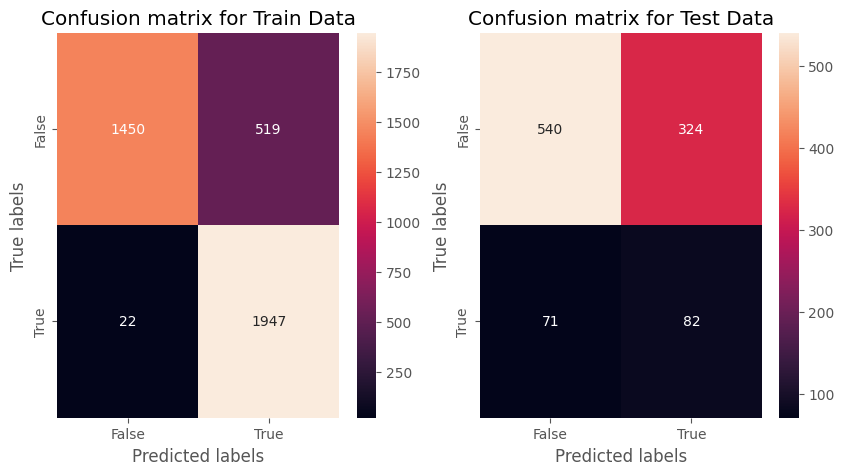



The classification report for train data is:

               precision    recall  f1-score      support
0              0.985054  0.736414  0.842778  1969.000000
1              0.789538  0.988827  0.878016  1969.000000
accuracy       0.862621  0.862621  0.862621     0.862621
macro avg      0.887296  0.862621  0.860397  3938.000000
weighted avg   0.887296  0.862621  0.860397  3938.000000


The classification report for test data is:

               precision    recall  f1-score      support
0              0.883797  0.625000  0.732203   864.000000
1              0.201970  0.535948  0.293381   153.000000
accuracy       0.611603  0.611603  0.611603     0.611603
macro avg      0.542884  0.580474  0.512792  1017.000000
weighted avg   0.781221  0.611603  0.666186  1017.000000


In [91]:
# Visualizing evaluation Metric Score chart
knn_scores=model_scores(knn,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [92]:
# Evaluation metric score chart
model_df['KNearestNeighbors']=knn_scores
model_df

Logistic Regression  Logistic Regression tuned  \
precision_train             0.670311                   0.671785   
precision_test              0.586893                   0.585232   
recall_train                0.686135                   0.685119   
recall_test                 0.771242                   0.764706   
roc_auc_train               0.740657                   0.740450   
roc_auc_test                0.730180                   0.730687   
accuracy_train              0.670137                   0.671661   
accuracy_test               0.598820                   0.597837   
f1_train                    0.670053                   0.671601   
f1_test                     0.536467                   0.534943   

                 KNearestNeighbors  
precision_train           0.887296  
precision_test            0.542884  
recall_train              0.988827  
recall_test               0.535948  
roc_auc_train             0.980790  
roc_auc_test              0.592407  
accuracy_train            0.862621  
accuracy_test             0.611603  
f1_train                  0.860397  
f1_test                   0.512792

#### 2. Cross- Validation & Hyperparameter Tuning

In [93]:
# finding best k value
recall_tr=[]
recall_tst=[]
for i in range(1,68):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_res_scaled_tr,y_res_tr)
  y_pred_knn_tr=knn.predict(X_res_scaled_tr)
  y_pred_knn_tst=knn.predict(X_scaled_tst)
  recall_score_tr=recall_score(y_res_tr,y_pred_knn_tr)
  recall_score_tst=recall_score(y_test,y_pred_knn_tst)
  recall_tr.append(recall_score_tr)
  recall_tst.append(recall_score_tst)


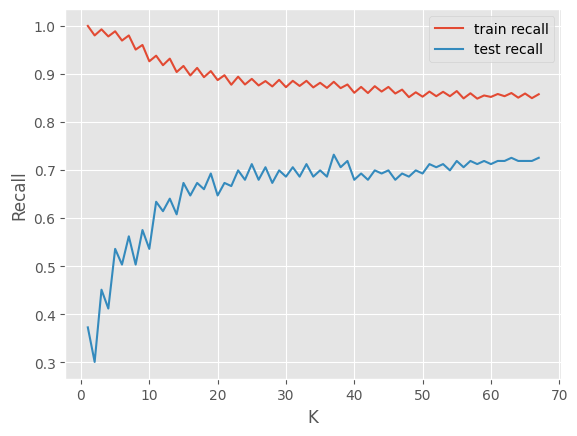

In [94]:
k_values=range(1,68)
plt.plot(k_values,recall_tr,label='train recall')
plt.plot(k_values,recall_tst,label='test recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()


In [95]:
# best value of k
best_k=recall_tst.index(max(recall_tst))
print(best_k)

36


In [96]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

param_grid={'n_neighbors':[36],
            'weights':['uniform','distance'],
            'metric':['minkowski','euclidiean','manhattan']}
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
knn=KNeighborsClassifier()
knn_grid=GridSearchCV(knn,param_grid=param_grid,cv=skf,scoring='recall')

# Fit the Algorithm
knn_grid.fit(X_res_scaled_tr,y_res_tr)
print(knn_grid.best_params_)
knn_optimal=knn_grid.best_estimator_


{'metric': 'manhattan', 'n_neighbors': 36, 'weights': 'distance'}


 ROc-AUC score for train data is 1.0
 ROC-AUC score for test data is 0.6578385984023238


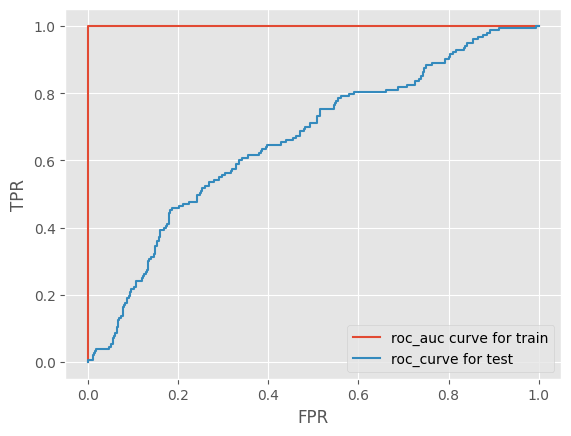

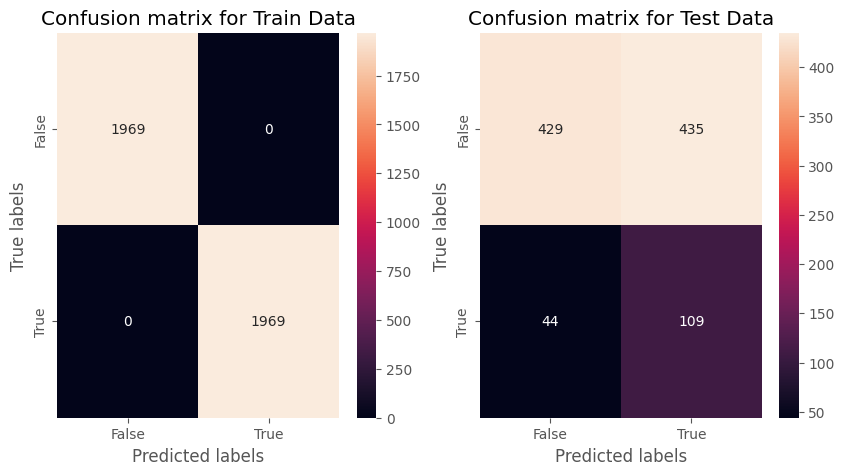



The classification report for train data is:

               precision  recall  f1-score  support
0                   1.0     1.0       1.0   1969.0
1                   1.0     1.0       1.0   1969.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   3938.0
weighted avg        1.0     1.0       1.0   3938.0


The classification report for test data is:

               precision    recall  f1-score      support
0              0.906977  0.496528  0.641735   864.000000
1              0.200368  0.712418  0.312769   153.000000
accuracy       0.529007  0.529007  0.529007     0.529007
macro avg      0.553672  0.604473  0.477252  1017.000000
weighted avg   0.800673  0.529007  0.592245  1017.000000


In [97]:
# Visualizing evaluation Metric Score chart
knn_tuned=model_scores(knn_optimal,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [98]:
# Evaluation metric score chart
model_df['KNearestNeighbors_tuned']=knn_tuned
model_df

Logistic Regression  Logistic Regression tuned  \
precision_train             0.670311                   0.671785   
precision_test              0.586893                   0.585232   
recall_train                0.686135                   0.685119   
recall_test                 0.771242                   0.764706   
roc_auc_train               0.740657                   0.740450   
roc_auc_test                0.730180                   0.730687   
accuracy_train              0.670137                   0.671661   
accuracy_test               0.598820                   0.597837   
f1_train                    0.670053                   0.671601   
f1_test                     0.536467                   0.534943   

                 KNearestNeighbors  KNearestNeighbors_tuned  
precision_train           0.887296                 1.000000  
precision_test            0.542884                 0.553672  
recall_train              0.988827                 1.000000  
recall_test               0.535948                 0.712418  
roc_auc_train             0.980790                 1.000000  
roc_auc_test              0.592407                 0.657839  
accuracy_train            0.862621                 1.000000  
accuracy_test             0.611603                 0.529007  
f1_train                  0.860397                 1.000000  
f1_test                   0.512792                 0.477252

##### Which hyperparameter optimization technique have you used and why?

Here i have used GridSearchcv, and passed various values of k, different types of weight and different types of distance metric as my hyperparameters, with scoring set to recall.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

From the above evaluation score chart we see that the recall score has improved as compared to knn model without tuning, but the model score has not improved as compared to logistic regression.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### Naive Bayes

In [99]:
# ML Model - 3 Implementation
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

 ROc-AUC score for train data is 0.7201678066918908
 ROC-AUC score for test data is 0.7128267973856208


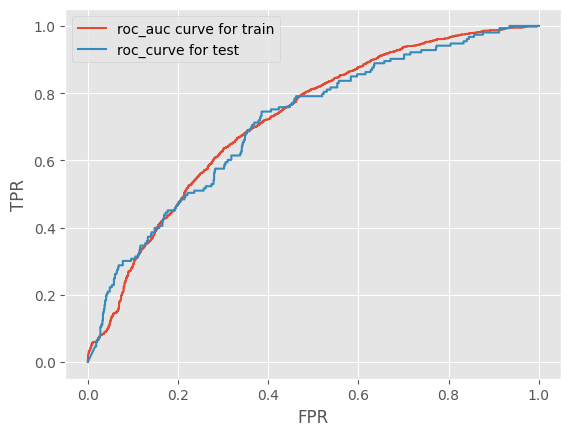

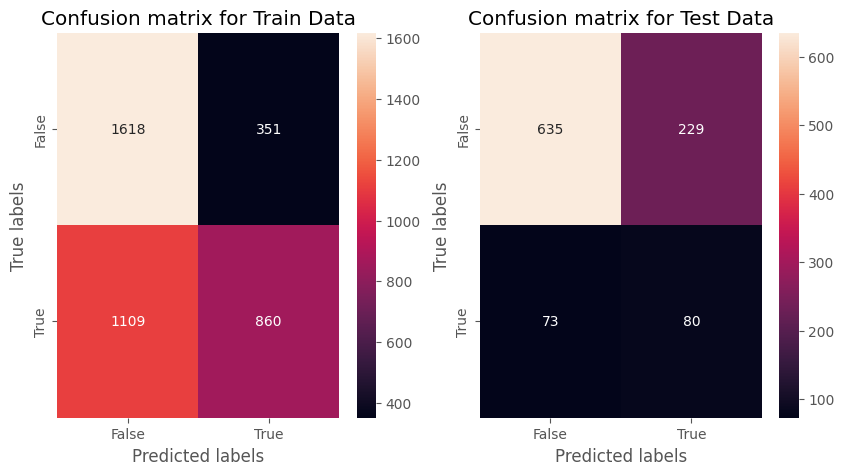



The classification report for train data is:

               precision    recall  f1-score      support
0              0.593326  0.821737  0.689097  1969.000000
1              0.710157  0.436770  0.540881  1969.000000
accuracy       0.629253  0.629253  0.629253     0.629253
macro avg      0.651741  0.629253  0.614989  3938.000000
weighted avg   0.651741  0.629253  0.614989  3938.000000


The classification report for test data is:

               precision    recall  f1-score      support
0              0.896893  0.734954  0.807888   864.000000
1              0.258900  0.522876  0.346320   153.000000
accuracy       0.703048  0.703048  0.703048     0.703048
macro avg      0.577896  0.628915  0.577104  1017.000000
weighted avg   0.800911  0.703048  0.738449  1017.000000


In [100]:
# Visualizing evaluation Metric Score chart
nb_model=model_scores(nb,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [101]:
model_df['Naive Bayes']=nb_model

In [102]:
model_df

Logistic Regression  Logistic Regression tuned  \
precision_train             0.670311                   0.671785   
precision_test              0.586893                   0.585232   
recall_train                0.686135                   0.685119   
recall_test                 0.771242                   0.764706   
roc_auc_train               0.740657                   0.740450   
roc_auc_test                0.730180                   0.730687   
accuracy_train              0.670137                   0.671661   
accuracy_test               0.598820                   0.597837   
f1_train                    0.670053                   0.671601   
f1_test                     0.536467                   0.534943   

                 KNearestNeighbors  KNearestNeighbors_tuned  Naive Bayes  
precision_train           0.887296                 1.000000     0.651741  
precision_test            0.542884                 0.553672     0.577896  
recall_train              0.988827                 1.000000     0.436770  
recall_test               0.535948                 0.712418     0.522876  
roc_auc_train             0.980790                 1.000000     0.720168  
roc_auc_test              0.592407                 0.657839     0.712827  
accuracy_train            0.862621                 1.000000     0.629253  
accuracy_test             0.611603                 0.529007     0.703048  
f1_train                  0.860397                 1.000000     0.614989  
f1_test                   0.512792                 0.477252     0.577104

#### 2. Cross- Validation & Hyperparameter Tuning

In [103]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
nb=GaussianNB()
nb_grid=GridSearchCV(nb,param_grid={'var_smoothing':np.logspace(0,-9,num=100)},cv=skf,scoring='recall')

# Fit the Algorithm
nb_grid.fit(X_res_scaled_tr,y_res_tr)
nb_optimal=nb_grid.best_estimator_
# Fit the Algorithm

# Predict on the model

 ROc-AUC score for train data is 0.7192708412594297
 ROC-AUC score for test data is 0.7202099975792786


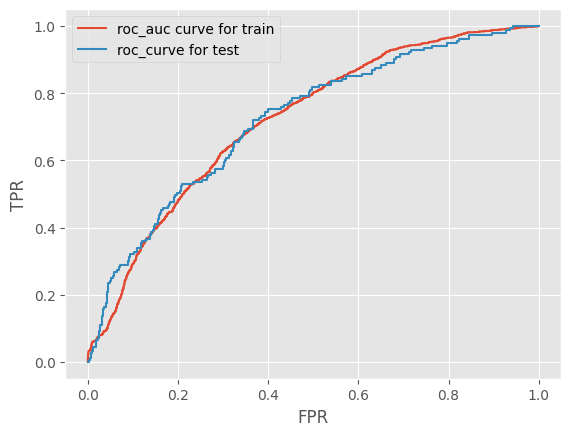

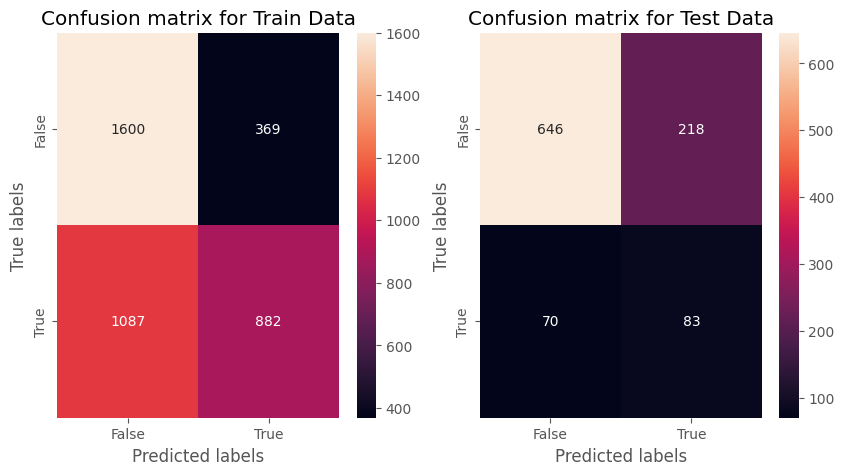



The classification report for train data is:

               precision    recall  f1-score      support
0              0.595460  0.812595  0.687285  1969.000000
1              0.705036  0.447943  0.547826  1969.000000
accuracy       0.630269  0.630269  0.630269     0.630269
macro avg      0.650248  0.630269  0.617556  3938.000000
weighted avg   0.650248  0.630269  0.617556  3938.000000


The classification report for test data is:

               precision    recall  f1-score      support
0              0.902235  0.747685  0.817722   864.000000
1              0.275748  0.542484  0.365639   153.000000
accuracy       0.716814  0.716814  0.716814     0.716814
macro avg      0.588991  0.645084  0.591680  1017.000000
weighted avg   0.807984  0.716814  0.749709  1017.000000


In [104]:
nb_model_cross_validated=model_scores(nb_optimal,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [105]:
model_df['Naive Bayes_tuned']=nb_model_cross_validated

In [106]:
model_df

Logistic Regression  Logistic Regression tuned  \
precision_train             0.670311                   0.671785   
precision_test              0.586893                   0.585232   
recall_train                0.686135                   0.685119   
recall_test                 0.771242                   0.764706   
roc_auc_train               0.740657                   0.740450   
roc_auc_test                0.730180                   0.730687   
accuracy_train              0.670137                   0.671661   
accuracy_test               0.598820                   0.597837   
f1_train                    0.670053                   0.671601   
f1_test                     0.536467                   0.534943   

                 KNearestNeighbors  KNearestNeighbors_tuned  Naive Bayes  \
precision_train           0.887296                 1.000000     0.651741   
precision_test            0.542884                 0.553672     0.577896   
recall_train              0.988827                 1.000000     0.436770   
recall_test               0.535948                 0.712418     0.522876   
roc_auc_train             0.980790                 1.000000     0.720168   
roc_auc_test              0.592407                 0.657839     0.712827   
accuracy_train            0.862621                 1.000000     0.629253   
accuracy_test             0.611603                 0.529007     0.703048   
f1_train                  0.860397                 1.000000     0.614989   
f1_test                   0.512792                 0.477252     0.577104   

                 Naive Bayes_tuned  
precision_train           0.650248  
precision_test            0.588991  
recall_train              0.447943  
recall_test               0.542484  
roc_auc_train             0.719271  
roc_auc_test              0.720210  
accuracy_train            0.630269  
accuracy_test             0.716814  
f1_train                  0.617556  
f1_test                   0.591680

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

### Decision Tree

In [107]:
# ML Model - 3 Implementation
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()


 ROc-AUC score for train data is 1.0
 ROC-AUC score for test data is 0.542687908496732


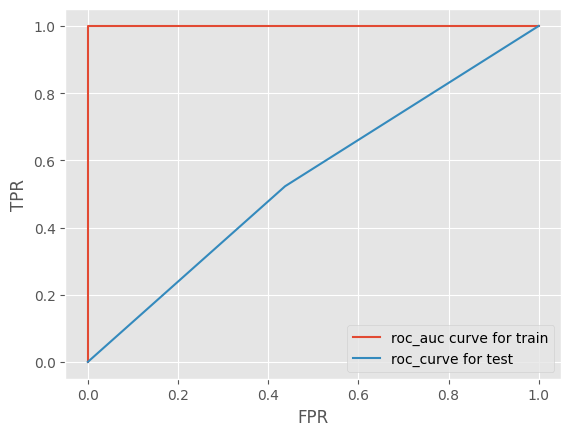

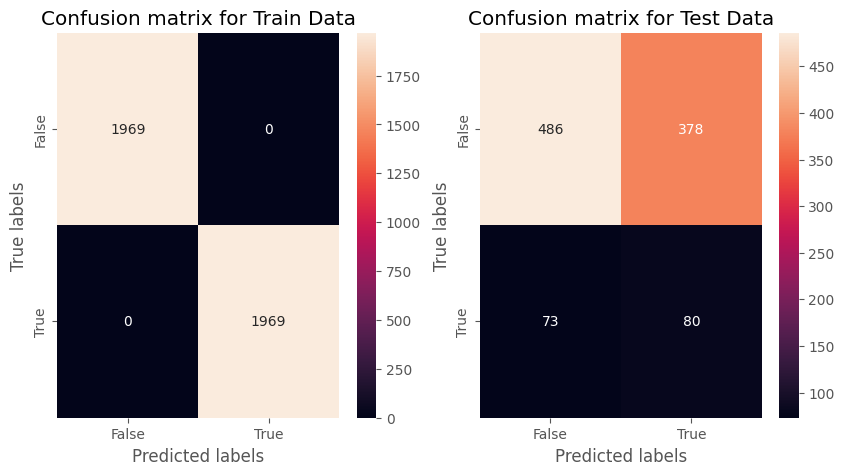



The classification report for train data is:

               precision  recall  f1-score  support
0                   1.0     1.0       1.0   1969.0
1                   1.0     1.0       1.0   1969.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   3938.0
weighted avg        1.0     1.0       1.0   3938.0


The classification report for test data is:

               precision    recall  f1-score      support
0              0.869410  0.562500  0.683064   864.000000
1              0.174672  0.522876  0.261866   153.000000
accuracy       0.556539  0.556539  0.556539     0.556539
macro avg      0.522041  0.542688  0.472465  1017.000000
weighted avg   0.764892  0.556539  0.619698  1017.000000


In [108]:
dt_model=model_scores(dt,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [109]:
model_df['Decision Tree']=dt_model

In [110]:
model_df

Logistic Regression  Logistic Regression tuned  \
precision_train             0.670311                   0.671785   
precision_test              0.586893                   0.585232   
recall_train                0.686135                   0.685119   
recall_test                 0.771242                   0.764706   
roc_auc_train               0.740657                   0.740450   
roc_auc_test                0.730180                   0.730687   
accuracy_train              0.670137                   0.671661   
accuracy_test               0.598820                   0.597837   
f1_train                    0.670053                   0.671601   
f1_test                     0.536467                   0.534943   

                 KNearestNeighbors  KNearestNeighbors_tuned  Naive Bayes  \
precision_train           0.887296                 1.000000     0.651741   
precision_test            0.542884                 0.553672     0.577896   
recall_train              0.988827                 1.000000     0.436770   
recall_test               0.535948                 0.712418     0.522876   
roc_auc_train             0.980790                 1.000000     0.720168   
roc_auc_test              0.592407                 0.657839     0.712827   
accuracy_train            0.862621                 1.000000     0.629253   
accuracy_test             0.611603                 0.529007     0.703048   
f1_train                  0.860397                 1.000000     0.614989   
f1_test                   0.512792                 0.477252     0.577104   

                 Naive Bayes_tuned  Decision Tree  
precision_train           0.650248       1.000000  
precision_test            0.588991       0.522041  
recall_train              0.447943       1.000000  
recall_test               0.542484       0.522876  
roc_auc_train             0.719271       1.000000  
roc_auc_test              0.720210       0.542688  
accuracy_train            0.630269       1.000000  
accuracy_test             0.716814       0.556539  
f1_train                  0.617556       1.000000  
f1_test                   0.591680       0.472465

Looking at the model 's performance model seems to have been overfitted, need to do cross validation and hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [111]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'max_depth' : [5,6,7,8,9,10],
        'min_samples_split' : [2,3,4,5,6,7,8,9,10],
        'min_samples_leaf' : np.arange(10,20)}
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
dt=DecisionTreeClassifier()

dt_grid=GridSearchCV(dt,param_grid=param_grid,cv=skf,scoring='recall')

# Fit the Algorithm
dt_grid.fit(X_res_scaled_tr,y_res_tr)
dt_optimal=dt_grid.best_estimator_
# Fit the Algorithm

# Predict on the model


In [112]:
dt_grid.best_params_

{'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 5}

 ROc-AUC score for train data is 0.8172686029083089
 ROC-AUC score for test data is 0.6172309973372064


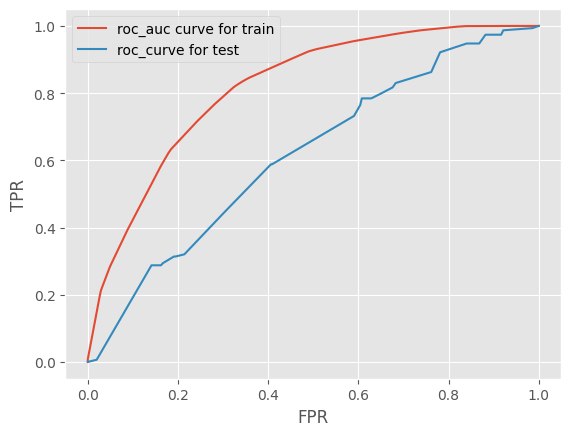

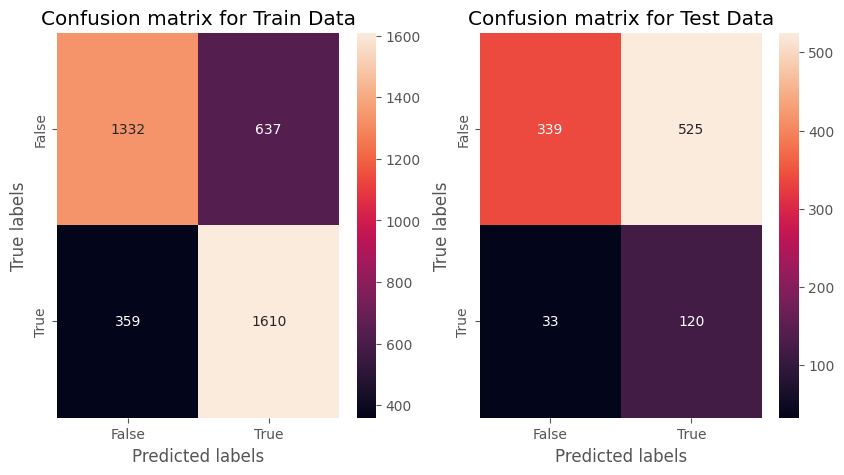



The classification report for train data is:

               precision    recall  f1-score     support
0              0.787700  0.676486  0.727869  1969.00000
1              0.716511  0.817674  0.763757  1969.00000
accuracy       0.747080  0.747080  0.747080     0.74708
macro avg      0.752105  0.747080  0.745813  3938.00000
weighted avg   0.752105  0.747080  0.745813  3938.00000


The classification report for test data is:

               precision    recall  f1-score      support
0              0.911290  0.392361  0.548544   864.000000
1              0.186047  0.784314  0.300752   153.000000
accuracy       0.451327  0.451327  0.451327     0.451327
macro avg      0.548668  0.588337  0.424648  1017.000000
weighted avg   0.802183  0.451327  0.511265  1017.000000


In [113]:
dt_model_cross_validated=model_scores(dt_optimal,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

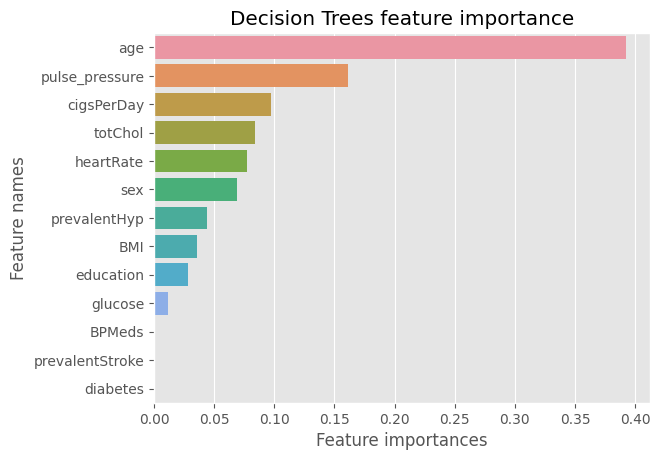

In [187]:
feature_importances(dt_optimal,X.columns,'Decision Trees')

In [114]:
model_df['Decision Trees tuned']=dt_model_cross_validated

In [115]:
model_df

Logistic Regression  Logistic Regression tuned  \
precision_train             0.670311                   0.671785   
precision_test              0.586893                   0.585232   
recall_train                0.686135                   0.685119   
recall_test                 0.771242                   0.764706   
roc_auc_train               0.740657                   0.740450   
roc_auc_test                0.730180                   0.730687   
accuracy_train              0.670137                   0.671661   
accuracy_test               0.598820                   0.597837   
f1_train                    0.670053                   0.671601   
f1_test                     0.536467                   0.534943   

                 KNearestNeighbors  KNearestNeighbors_tuned  Naive Bayes  \
precision_train           0.887296                 1.000000     0.651741   
precision_test            0.542884                 0.553672     0.577896   
recall_train              0.988827                 1.000000     0.436770   
recall_test               0.535948                 0.712418     0.522876   
roc_auc_train             0.980790                 1.000000     0.720168   
roc_auc_test              0.592407                 0.657839     0.712827   
accuracy_train            0.862621                 1.000000     0.629253   
accuracy_test             0.611603                 0.529007     0.703048   
f1_train                  0.860397                 1.000000     0.614989   
f1_test                   0.512792                 0.477252     0.577104   

                 Naive Bayes_tuned  Decision Tree  Decision Trees tuned  
precision_train           0.650248       1.000000              0.752105  
precision_test            0.588991       0.522041              0.548668  
recall_train              0.447943       1.000000              0.817674  
recall_test               0.542484       0.522876              0.784314  
roc_auc_train             0.719271       1.000000              0.817269  
roc_auc_test              0.720210       0.542688              0.617231  
accuracy_train            0.630269       1.000000              0.747080  
accuracy_test             0.716814       0.556539              0.451327  
f1_train                  0.617556       1.000000              0.745813  
f1_test                   0.591680       0.472465              0.424648

##### Which hyperparameter optimization technique have you used and why?

Here we used GridSearchCV with scoring on recall and we have passed on hyperparameters like max_depth, min_samples_split, min_samples_leaf.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### Random Forest

In [116]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()


 ROc-AUC score for train data is 1.0
 ROC-AUC score for test data is 0.6102714233841684


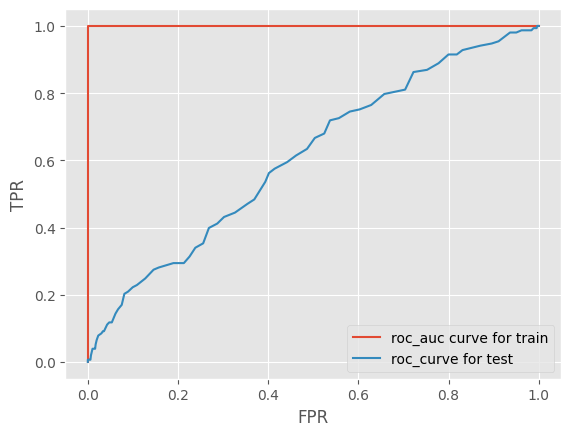

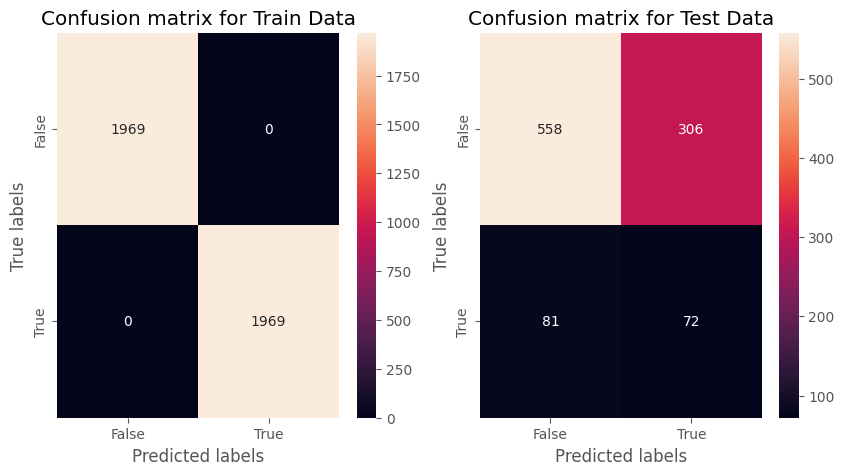



The classification report for train data is:

               precision  recall  f1-score  support
0                   1.0     1.0       1.0   1969.0
1                   1.0     1.0       1.0   1969.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   3938.0
weighted avg        1.0     1.0       1.0   3938.0


The classification report for test data is:

               precision    recall  f1-score      support
0              0.873239  0.645833  0.742515   864.000000
1              0.190476  0.470588  0.271186   153.000000
accuracy       0.619469  0.619469  0.619469     0.619469
macro avg      0.531858  0.558211  0.506851  1017.000000
weighted avg   0.770523  0.619469  0.671607  1017.000000


In [117]:
rf_model=model_scores(rf,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [118]:
model_df['RandomForest']=rf_model

In [119]:
model_df

Logistic Regression  Logistic Regression tuned  \
precision_train             0.670311                   0.671785   
precision_test              0.586893                   0.585232   
recall_train                0.686135                   0.685119   
recall_test                 0.771242                   0.764706   
roc_auc_train               0.740657                   0.740450   
roc_auc_test                0.730180                   0.730687   
accuracy_train              0.670137                   0.671661   
accuracy_test               0.598820                   0.597837   
f1_train                    0.670053                   0.671601   
f1_test                     0.536467                   0.534943   

                 KNearestNeighbors  KNearestNeighbors_tuned  Naive Bayes  \
precision_train           0.887296                 1.000000     0.651741   
precision_test            0.542884                 0.553672     0.577896   
recall_train              0.988827                 1.000000     0.436770   
recall_test               0.535948                 0.712418     0.522876   
roc_auc_train             0.980790                 1.000000     0.720168   
roc_auc_test              0.592407                 0.657839     0.712827   
accuracy_train            0.862621                 1.000000     0.629253   
accuracy_test             0.611603                 0.529007     0.703048   
f1_train                  0.860397                 1.000000     0.614989   
f1_test                   0.512792                 0.477252     0.577104   

                 Naive Bayes_tuned  Decision Tree  Decision Trees tuned  \
precision_train           0.650248       1.000000              0.752105   
precision_test            0.588991       0.522041              0.548668   
recall_train              0.447943       1.000000              0.817674   
recall_test               0.542484       0.522876              0.784314   
roc_auc_train             0.719271       1.000000              0.817269   
roc_auc_test              0.720210       0.542688              0.617231   
accuracy_train            0.630269       1.000000              0.747080   
accuracy_test             0.716814       0.556539              0.451327   
f1_train                  0.617556       1.000000              0.745813   
f1_test                   0.591680       0.472465              0.424648   

                 RandomForest  
precision_train      1.000000  
precision_test       0.531858  
recall_train         1.000000  
recall_test          0.470588  
roc_auc_train        1.000000  
roc_auc_test         0.610271  
accuracy_train       1.000000  
accuracy_test        0.619469  
f1_train             1.000000  
f1_test              0.506851

Looking at the model 's performance model seems to have been overfitted, need to do cross validation and hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [120]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'n_estimators' : [50,100,150,200,250],
        'max_depth' : [5,8,10,12,15,17],
        'min_samples_split' : [2,3,4,5]}
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
rf=RandomForestClassifier()

rf_grid=GridSearchCV(rf,param_grid=param_grid,cv=skf,scoring='recall')

# Fit the Algorithm
rf_grid.fit(X_res_scaled_tr,y_res_tr)
rf_optimal=rf_grid.best_estimator_
# Fit the Algorithm

# Predict on the model


In [121]:
rf_grid.best_params_

{'max_depth': 15, 'min_samples_split': 2, 'n_estimators': 250}

 ROc-AUC score for train data is 0.9999556353545986
 ROC-AUC score for test data is 0.6231693294601792


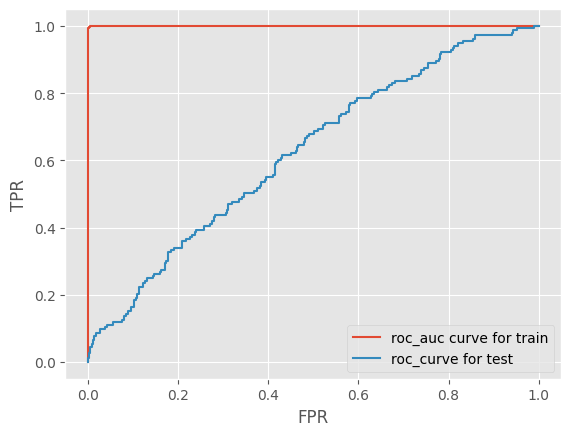

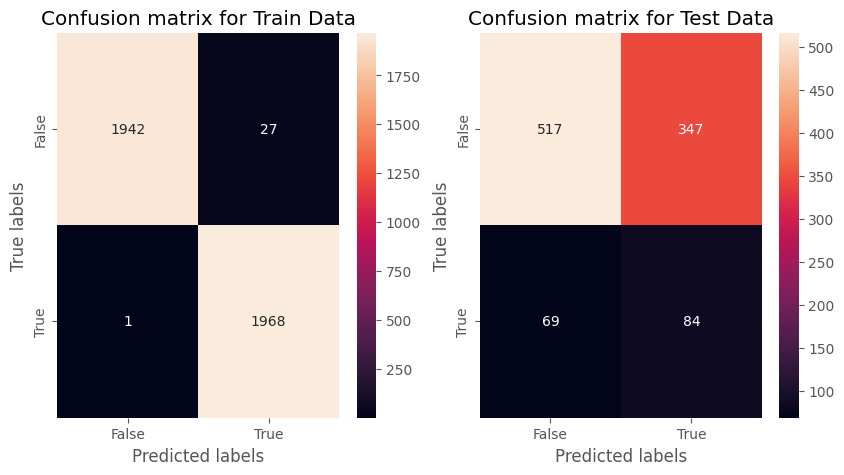



The classification report for train data is:

               precision    recall  f1-score     support
0              0.999485  0.986287  0.992843  1969.00000
1              0.986466  0.999492  0.992936  1969.00000
accuracy       0.992890  0.992890  0.992890     0.99289
macro avg      0.992976  0.992890  0.992889  3938.00000
weighted avg   0.992976  0.992890  0.992889  3938.00000


The classification report for test data is:

               precision    recall  f1-score      support
0              0.882253  0.598380  0.713103   864.000000
1              0.194896  0.549020  0.287671   153.000000
accuracy       0.590954  0.590954  0.590954     0.590954
macro avg      0.538574  0.573700  0.500387  1017.000000
weighted avg   0.778845  0.590954  0.649100  1017.000000


In [122]:
rf_model_cross_validated=model_scores(rf_optimal,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

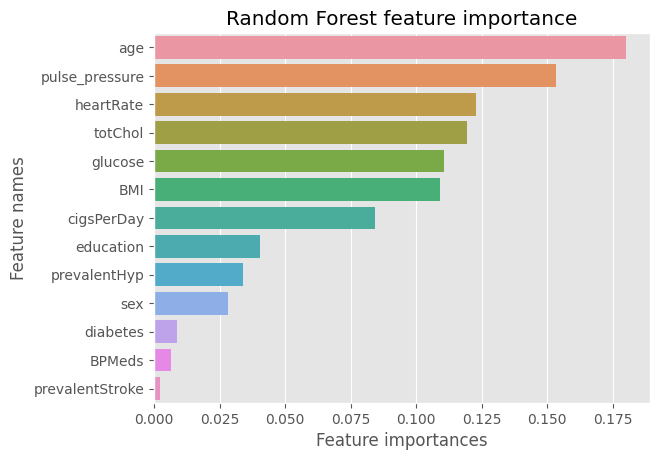

In [186]:
feature_importances(rf_optimal,X.columns,'Random Forest')

In [123]:
model_df['RandomForestTuned']=rf_model_cross_validated

In [124]:
model_df

Logistic Regression  Logistic Regression tuned  \
precision_train             0.670311                   0.671785   
precision_test              0.586893                   0.585232   
recall_train                0.686135                   0.685119   
recall_test                 0.771242                   0.764706   
roc_auc_train               0.740657                   0.740450   
roc_auc_test                0.730180                   0.730687   
accuracy_train              0.670137                   0.671661   
accuracy_test               0.598820                   0.597837   
f1_train                    0.670053                   0.671601   
f1_test                     0.536467                   0.534943   

                 KNearestNeighbors  KNearestNeighbors_tuned  Naive Bayes  \
precision_train           0.887296                 1.000000     0.651741   
precision_test            0.542884                 0.553672     0.577896   
recall_train              0.988827                 1.000000     0.436770   
recall_test               0.535948                 0.712418     0.522876   
roc_auc_train             0.980790                 1.000000     0.720168   
roc_auc_test              0.592407                 0.657839     0.712827   
accuracy_train            0.862621                 1.000000     0.629253   
accuracy_test             0.611603                 0.529007     0.703048   
f1_train                  0.860397                 1.000000     0.614989   
f1_test                   0.512792                 0.477252     0.577104   

                 Naive Bayes_tuned  Decision Tree  Decision Trees tuned  \
precision_train           0.650248       1.000000              0.752105   
precision_test            0.588991       0.522041              0.548668   
recall_train              0.447943       1.000000              0.817674   
recall_test               0.542484       0.522876              0.784314   
roc_auc_train             0.719271       1.000000              0.817269   
roc_auc_test              0.720210       0.542688              0.617231   
accuracy_train            0.630269       1.000000              0.747080   
accuracy_test             0.716814       0.556539              0.451327   
f1_train                  0.617556       1.000000              0.745813   
f1_test                   0.591680       0.472465              0.424648   

                 RandomForest  RandomForestTuned  
precision_train      1.000000           0.992976  
precision_test       0.531858           0.538574  
recall_train         1.000000           0.999492  
recall_test          0.470588           0.549020  
roc_auc_train        1.000000           0.999956  
roc_auc_test         0.610271           0.623169  
accuracy_train       1.000000           0.992890  
accuracy_test        0.619469           0.590954  
f1_train             1.000000           0.992889  
f1_test              0.506851           0.500387

##### Which hyperparameter optimization technique have you used and why?

Here we used GridSearchCV with scoring on recall and we have passed on hyperparameters like max_depth, min_samples_split, min_samples_leaf.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

Answer Here.

### SVM

In [125]:
# ML Model - 3 Implementation
from sklearn.svm import SVC
svc = SVC(probability=True)
#svc_model=model_scores(svc,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

 ROc-AUC score for train data is 0.86542681239249
 ROC-AUC score for test data is 0.5791991951101428


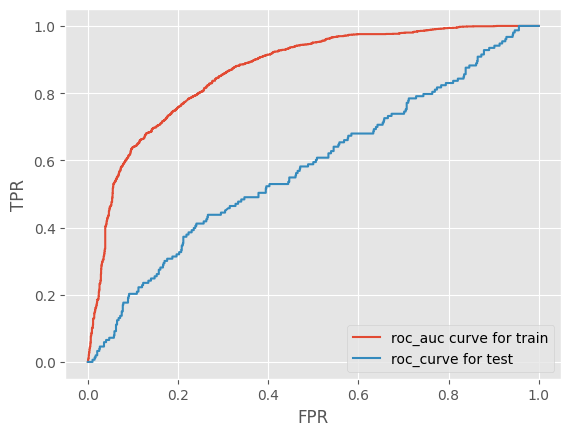

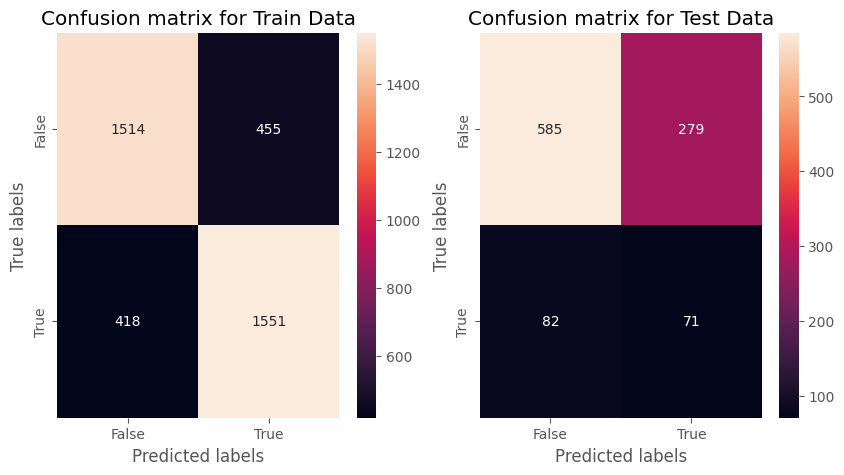



The classification report for train data is:

               precision    recall  f1-score      support
0              0.783644  0.768918  0.776211  1969.000000
1              0.773180  0.787709  0.780377  1969.000000
accuracy       0.778314  0.778314  0.778314     0.778314
macro avg      0.778412  0.778314  0.778294  3938.000000
weighted avg   0.778412  0.778314  0.778294  3938.000000


The classification report for test data is:

               precision    recall  f1-score      support
0              0.877061  0.677083  0.764206   864.000000
1              0.202857  0.464052  0.282306   153.000000
accuracy       0.645034  0.645034  0.645034     0.645034
macro avg      0.539959  0.570568  0.523256  1017.000000
weighted avg   0.775632  0.645034  0.691708  1017.000000


In [126]:
svc_model=model_scores(svc,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [127]:
model_df['SVM']=svc_model

In [128]:
model_df

Logistic Regression  Logistic Regression tuned  \
precision_train             0.670311                   0.671785   
precision_test              0.586893                   0.585232   
recall_train                0.686135                   0.685119   
recall_test                 0.771242                   0.764706   
roc_auc_train               0.740657                   0.740450   
roc_auc_test                0.730180                   0.730687   
accuracy_train              0.670137                   0.671661   
accuracy_test               0.598820                   0.597837   
f1_train                    0.670053                   0.671601   
f1_test                     0.536467                   0.534943   

                 KNearestNeighbors  KNearestNeighbors_tuned  Naive Bayes  \
precision_train           0.887296                 1.000000     0.651741   
precision_test            0.542884                 0.553672     0.577896   
recall_train              0.988827                 1.000000     0.436770   
recall_test               0.535948                 0.712418     0.522876   
roc_auc_train             0.980790                 1.000000     0.720168   
roc_auc_test              0.592407                 0.657839     0.712827   
accuracy_train            0.862621                 1.000000     0.629253   
accuracy_test             0.611603                 0.529007     0.703048   
f1_train                  0.860397                 1.000000     0.614989   
f1_test                   0.512792                 0.477252     0.577104   

                 Naive Bayes_tuned  Decision Tree  Decision Trees tuned  \
precision_train           0.650248       1.000000              0.752105   
precision_test            0.588991       0.522041              0.548668   
recall_train              0.447943       1.000000              0.817674   
recall_test               0.542484       0.522876              0.784314   
roc_auc_train             0.719271       1.000000              0.817269   
roc_auc_test              0.720210       0.542688              0.617231   
accuracy_train            0.630269       1.000000              0.747080   
accuracy_test             0.716814       0.556539              0.451327   
f1_train                  0.617556       1.000000              0.745813   
f1_test                   0.591680       0.472465              0.424648   

                 RandomForest  RandomForestTuned       SVM  
precision_train      1.000000           0.992976  0.778412  
precision_test       0.531858           0.538574  0.539959  
recall_train         1.000000           0.999492  0.787709  
recall_test          0.470588           0.549020  0.464052  
roc_auc_train        1.000000           0.999956  0.865427  
roc_auc_test         0.610271           0.623169  0.579199  
accuracy_train       1.000000           0.992890  0.778314  
accuracy_test        0.619469           0.590954  0.645034  
f1_train             1.000000           0.992889  0.778294  
f1_test              0.506851           0.500387  0.523256

Looking at the model 's performance model seems to have been overfitted, need to do cross validation and hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
svc=SVC(probability=True)

svc_grid=GridSearchCV(svc,param_grid=param_grid,cv=skf,scoring='recall',verbose=2)

# Fit the Algorithm
svc_grid.fit(X_res_scaled_tr,y_res_tr)
svc_optimal=svc_grid.best_estimator_
# Fit the Algorithm

# Predict on the model


In [130]:
svc_grid.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

 ROc-AUC score for train data is 0.7502038323315607
 ROC-AUC score for test data is 0.7144078310336481


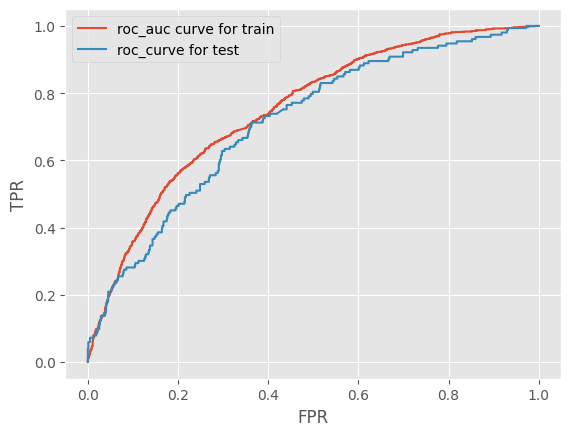

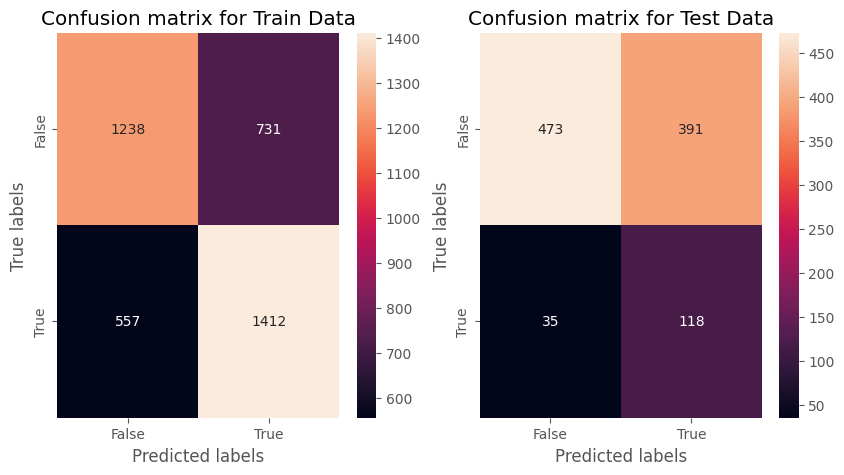



The classification report for train data is:

               precision    recall  f1-score     support
0              0.689694  0.628746  0.657811  1969.00000
1              0.658889  0.717115  0.686770  1969.00000
accuracy       0.672930  0.672930  0.672930     0.67293
macro avg      0.674292  0.672930  0.672291  3938.00000
weighted avg   0.674292  0.672930  0.672291  3938.00000


The classification report for test data is:

               precision    recall  f1-score      support
0              0.931102  0.547454  0.689504   864.000000
1              0.231827  0.771242  0.356495   153.000000
accuracy       0.581121  0.581121  0.581121     0.581121
macro avg      0.581465  0.659348  0.523000  1017.000000
weighted avg   0.825902  0.581121  0.639406  1017.000000


In [131]:
svc_model_cross_validated=model_scores(svc_optimal,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

In [132]:
model_df['SVM tuned']=svc_model_cross_validated

In [133]:
model_df

Logistic Regression  Logistic Regression tuned  \
precision_train             0.670311                   0.671785   
precision_test              0.586893                   0.585232   
recall_train                0.686135                   0.685119   
recall_test                 0.771242                   0.764706   
roc_auc_train               0.740657                   0.740450   
roc_auc_test                0.730180                   0.730687   
accuracy_train              0.670137                   0.671661   
accuracy_test               0.598820                   0.597837   
f1_train                    0.670053                   0.671601   
f1_test                     0.536467                   0.534943   

                 KNearestNeighbors  KNearestNeighbors_tuned  Naive Bayes  \
precision_train           0.887296                 1.000000     0.651741   
precision_test            0.542884                 0.553672     0.577896   
recall_train              0.988827                 1.000000     0.436770   
recall_test               0.535948                 0.712418     0.522876   
roc_auc_train             0.980790                 1.000000     0.720168   
roc_auc_test              0.592407                 0.657839     0.712827   
accuracy_train            0.862621                 1.000000     0.629253   
accuracy_test             0.611603                 0.529007     0.703048   
f1_train                  0.860397                 1.000000     0.614989   
f1_test                   0.512792                 0.477252     0.577104   

                 Naive Bayes_tuned  Decision Tree  Decision Trees tuned  \
precision_train           0.650248       1.000000              0.752105   
precision_test            0.588991       0.522041              0.548668   
recall_train              0.447943       1.000000              0.817674   
recall_test               0.542484       0.522876              0.784314   
roc_auc_train             0.719271       1.000000              0.817269   
roc_auc_test              0.720210       0.542688              0.617231   
accuracy_train            0.630269       1.000000              0.747080   
accuracy_test             0.716814       0.556539              0.451327   
f1_train                  0.617556       1.000000              0.745813   
f1_test                   0.591680       0.472465              0.424648   

                 RandomForest  RandomForestTuned       SVM  SVM tuned  
precision_train      1.000000           0.992976  0.778412   0.674292  
precision_test       0.531858           0.538574  0.539959   0.581465  
recall_train         1.000000           0.999492  0.787709   0.717115  
recall_test          0.470588           0.549020  0.464052   0.771242  
roc_auc_train        1.000000           0.999956  0.865427   0.750204  
roc_auc_test         0.610271           0.623169  0.579199   0.714408  
accuracy_train       1.000000           0.992890  0.778314   0.672930  
accuracy_test        0.619469           0.590954  0.645034   0.581121  
f1_train             1.000000           0.992889  0.778294   0.672291  
f1_test              0.506851           0.500387  0.523256   0.523000

##### Which hyperparameter optimization technique have you used and why?

Here we used GridSearchCV with scoring on recall and we have passed on hyperparameters like C,gamma, different types of kernals.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is significant improvement in recall score

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### XG Boost

In [134]:
# ML Model - 3 Implementation
import xgboost as xgb
xgb_mod=xgb.XGBClassifier(random_state=0)

 ROc-AUC score for train data is 0.9999840080929367
 ROC-AUC score for test data is 0.5631127450980392


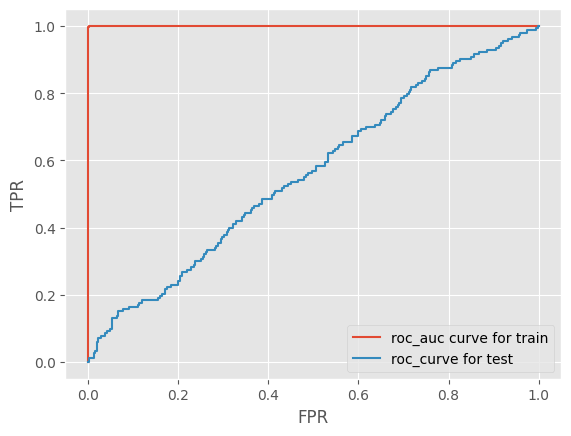

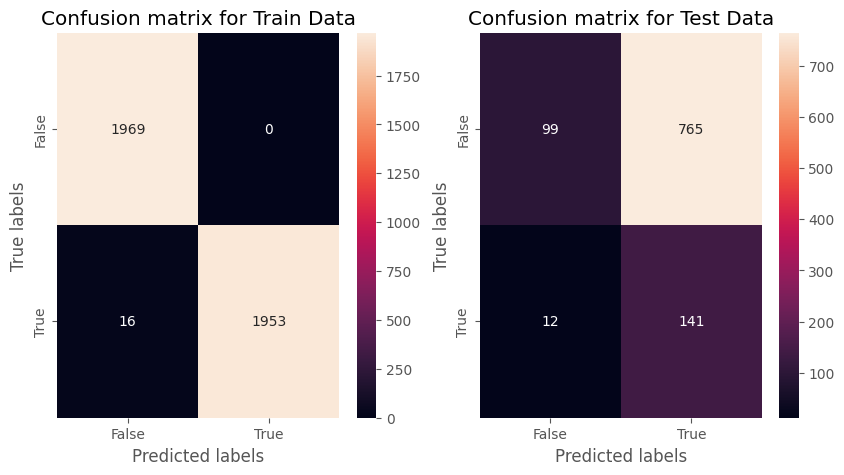



The classification report for train data is:

               precision    recall  f1-score      support
0              0.991940  1.000000  0.995953  1969.000000
1              1.000000  0.991874  0.995920  1969.000000
accuracy       0.995937  0.995937  0.995937     0.995937
macro avg      0.995970  0.995937  0.995937  3938.000000
weighted avg   0.995970  0.995937  0.995937  3938.000000


The classification report for test data is:

               precision    recall  f1-score      support
0              0.891892  0.114583  0.203077   864.000000
1              0.155629  0.921569  0.266289   153.000000
accuracy       0.235988  0.235988  0.235988     0.235988
macro avg      0.523761  0.518076  0.234683  1017.000000
weighted avg   0.781127  0.235988  0.212587  1017.000000


In [135]:
xgb_model=model_scores(xgb_mod,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [136]:
model_df['XG Boost']=xgb_model

In [137]:
model_df['XG Boost']

precision_train    0.995970
precision_test     0.523761
recall_train       0.991874
recall_test        0.921569
roc_auc_train      0.999984
roc_auc_test       0.563113
accuracy_train     0.995937
accuracy_test      0.235988
f1_train           0.995937
f1_test            0.234683
Name: XG Boost, dtype: float64

Looking at the model 's performance model seems to have been overfitted, need to do cross validation and hyperparameter tuning.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'learning_rate': np.arange(0.1,0.3,0.05),
              'max_depth':[2,3],
              'n_estimators': (100,150,200)
             }
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
xgb_mod=xgb.XGBClassifier(random_state=0)

xgb_grid=GridSearchCV(xgb_mod,param_grid=param_grid,cv=skf,scoring='f1')

# Fit the Algorithm
xgb_grid.fit(X_res_scaled_tr,y_res_tr)
xgb_optimal=xgb_grid.best_estimator_
# Fit the Algorithm

# Predict on the model


In [139]:
xgb_grid.best_params_

{'learning_rate': 0.25000000000000006, 'max_depth': 3, 'n_estimators': 200}

 ROc-AUC score for train data is 0.9897427392228088
 ROC-AUC score for test data is 0.571010348583878


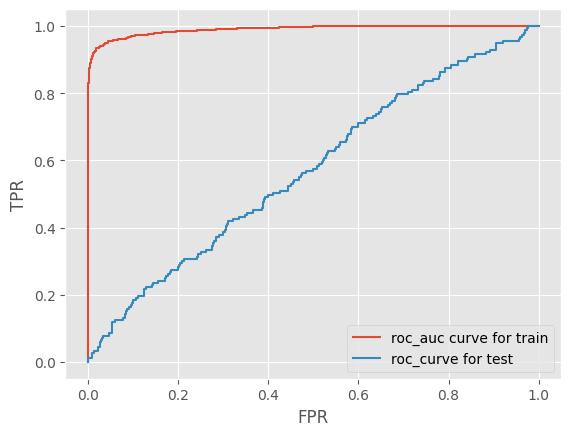

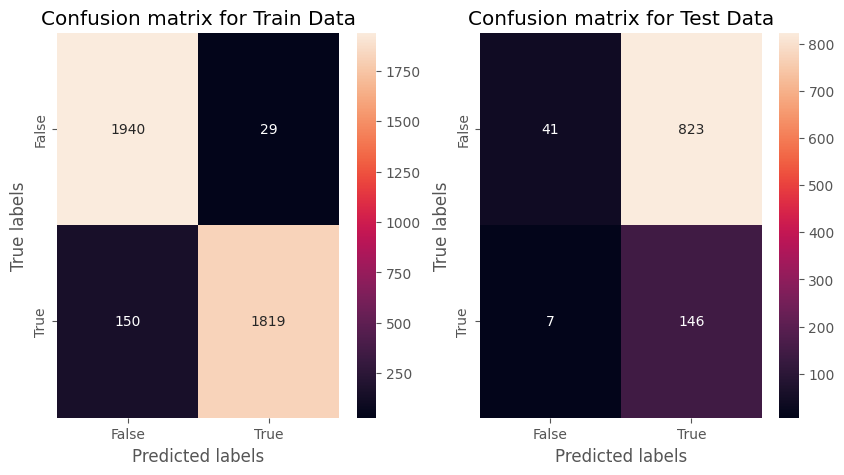



The classification report for train data is:

               precision    recall  f1-score      support
0              0.928230  0.985272  0.955900  1969.000000
1              0.984307  0.923819  0.953105  1969.000000
accuracy       0.954545  0.954545  0.954545     0.954545
macro avg      0.956269  0.954545  0.954503  3938.000000
weighted avg   0.956269  0.954545  0.954503  3938.000000


The classification report for test data is:

               precision    recall  f1-score      support
0              0.854167  0.047454  0.089912   864.000000
1              0.150671  0.954248  0.260250   153.000000
accuracy       0.183874  0.183874  0.183874     0.183874
macro avg      0.502419  0.500851  0.175081  1017.000000
weighted avg   0.748331  0.183874  0.115538  1017.000000


In [140]:
xgb_model_cross_validated=model_scores(xgb_optimal,X_res_scaled_tr,X_scaled_tst,y_res_tr,y_test)

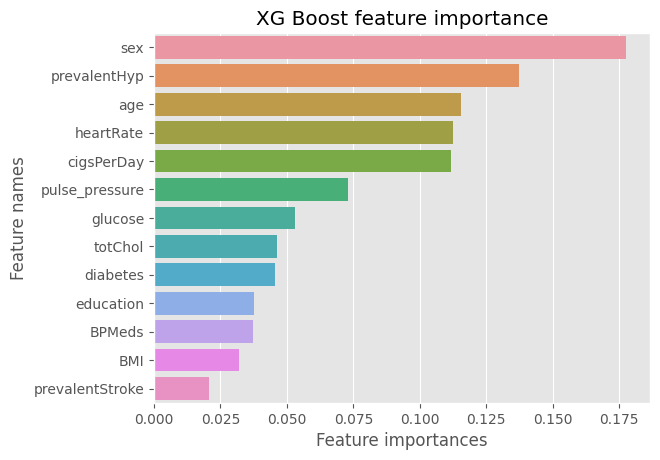

In [184]:
feature_importances(xgb_optimal,X.columns,'XG Boost')

In [141]:
model_df['XGBoost tuned']=xgb_model_cross_validated

In [142]:
model_df['XGBoost tuned']

precision_train    0.956269
precision_test     0.502419
recall_train       0.923819
recall_test        0.954248
roc_auc_train      0.989743
roc_auc_test       0.571010
accuracy_train     0.954545
accuracy_test      0.183874
f1_train           0.954503
f1_test            0.175081
Name: XGBoost tuned, dtype: float64

##### Which hyperparameter optimization technique have you used and why?

Here we used GridSearchCV with scoring on recall and we have passed on hyperparameters like learning rate, max_depth, n_estimators

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There seems to be improvement but model seems to have overfitted.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

We have used **Recall score** as our most important metric, because we want our model to predict as much positive labels as possible it is okay if it is not able to predict good negative labels, so we want high true positive labels for that we need high recall.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

We have used several ML models, models such as Knn, Xg boost, Random Forest have overfitted even after hypertuning them. But models such as Logistic Regression, Naive Bayes, Decision Trees, SVM showed no signs of Overfitting and have given good recall results, Let us look at their scores.

In [188]:
model_df.columns

Index(['Logistic Regression', 'Logistic Regression tuned', 'KNearestNeighbors',
       'KNearestNeighbors_tuned', 'Naive Bayes', 'Naive Bayes_tuned',
       'Decision Tree', 'Decision Trees tuned', 'RandomForest',
       'RandomForestTuned', 'SVM', 'SVM tuned', 'XG Boost', 'XGBoost tuned'],
      dtype='object')

In [204]:
best_models=model_df.loc[['recall_train','recall_test','f1_train','f1_test'],['Logistic Regression tuned','Naive Bayes_tuned','Decision Trees tuned','SVM tuned']].T

In [205]:
best_models

recall_train  recall_test  f1_train   f1_test
Logistic Regression tuned      0.685119     0.764706  0.671601  0.534943
Naive Bayes_tuned              0.447943     0.542484  0.617556  0.591680
Decision Trees tuned           0.817674     0.784314  0.745813  0.424648
SVM tuned                      0.717115     0.771242  0.672291  0.523000

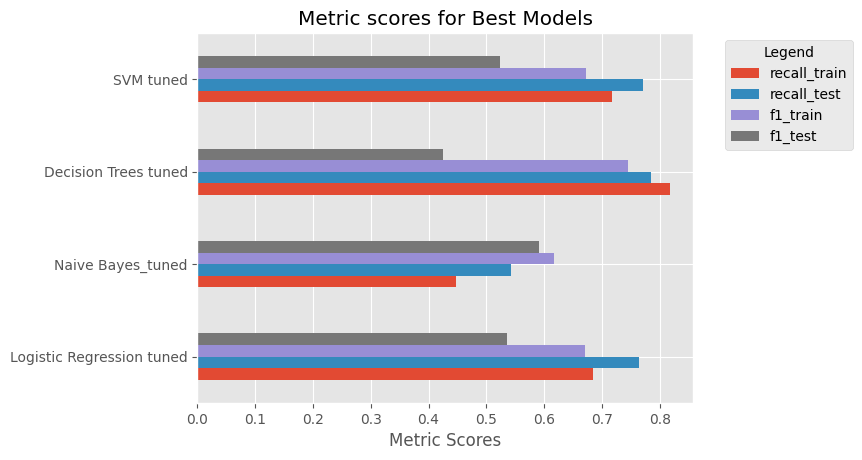

In [207]:
best_models.plot(kind='barh',y=['recall_train','recall_test','f1_train','f1_test'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.xlabel('Metric Scores')
plt.title("Metric scores for Best Models")
plt.show()

When we look into the scores we see that the metric scores are high for Decision Tree model and SVM. But we prefer **SVM model as the best model** because it has high Recall test score and higher f1 test score, which suggest that it has bit less False positives.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

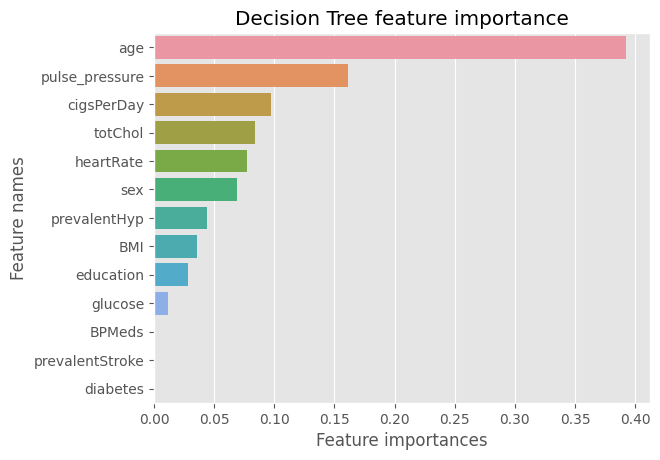

In [208]:
feature_importances(dt_optimal,X.columns,'Decision Tree')

Here we have used decision tree to calculate feature importance, we find that age has the most say in predicting the risk of getting a Coronary Heart Disease.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [143]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [144]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***